<a href="https://colab.research.google.com/github/mkorob/NovelAnalysis/blob/main/GoneWithTheWind_Lemmatized_PROD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gone With The Wind Character Analysis

Summary of what this notebook does to insert later.


## 0. Preliminaries

In [1]:
import requests
import pandas as pd
import nltk
from nltk import pos_tag, ne_chunk
from nltk.tokenize import word_tokenize
import re
from bs4 import BeautifulSoup

In [2]:
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('punkt')
nltk.download('words')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

## 1. Load Gone With The Wind Text from Gutenberg


In [ ]:
# URL of "Gone with the Wind" on Project Gutenberg
url = "https://gutenberg.net.au/ebooks02/0200161.txt"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Extract the content of the book
    content = response.text

    # Remove Project Gutenberg's header and footer
    start_index = content.find("CHAPTER I")
    end_index = content.find("THE END")
    content = content[start_index:end_index]

    # Display the first 500 characters of the content
    print(content[:500])
else:
    print("Failed to retrieve the book from Project Gutenberg.")

CHAPTER I


Scarlett O'Hara was not beautiful, but men seldom realized it when
caught by her charm as the Tarleton twins were.  In her face were
too sharply blended the delicate features of her mother, a Coast
aristocrat of French descent, and the heavy ones of her florid
Irish father.  But it was an arresting face, pointed of chin,
square of jaw.  Her eyes were pale green without a touch of hazel,
starred with bristly black lashes and slightly tilted at the ends.
Above them, her thick black bro


In [ ]:
#check the start and the end of the novel
print(f"The Start of the GTTW : {content[:100]}")
print(f"The End of the GTTW : {content[-100:]}")

The Start of the GTTW : CHAPTER I


Scarlett O'Hara was not beautiful, but men seldom realized it when
caught by her charm a
The End of the GTTW : it then.
Tomorrow, I'll think of some way to get him back.  After all,
tomorrow is another day."






## 2. Extract Main Characters

To analyze interactions, we need to map the named entities in the text to the names of the main characters. Here, we make a list of all characters in the novel the way they are referred to in a novel and map them to a unique list of characters in the novel. (e.g. "Catherine", "Cathy", -> "Catherine").

In [ ]:
import spacy

In [ ]:
def extract_characters(text):
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(text)
    named_entities = set()
    for ent in doc.ents:
        if ent.label_ in ["PERSON"]:
            named_entities.add(ent.text)

    return sorted(named_entities)

In [ ]:
len(content)

2340566

In [ ]:
#Spacy NER's extractor needs shorter texts so we split in thirds
thir_content = int(len(content)/3)
characters1 = extract_characters(content[:thir_content])
characters2 = extract_characters(content[thir_content:(thir_content*2)])
characters3 = extract_characters(content[(thir_content*2):])

In [ ]:
characters = set(characters1) | set(characters2) | set(characters3)

In [ ]:
characters = [c for c in list(characters) if c[0].isupper()]

In [ ]:
len(characters)

778

In [ ]:
characters = sorted(characters)

In [ ]:
#remove any characters that are subsets of one another (e.g. no need for Charles and Charles Hamilton)
unique_characters = set()
for name in characters:
    if not any(f"{n.strip()} " in name.strip() or f"{n.strip()}\n" in name.strip() for n in unique_characters):
        unique_characters.add(name)

In [ ]:
len(unique_characters)

535

In [ ]:
#export the dataframe to CSV and manually match characters
pd.DataFrame(characters).to_csv("possible_characters.csv")

In [ ]:
#export the dataframe to CSV and manually match characters
pd.DataFrame(unique_characters).to_csv("possible_reduced_characters_v2.csv")

In [ ]:
#import the completed list
characters = pd.read_excel("/content/possible_reduced_characters_v2 (1).xlsx")

In [ ]:
#this is old output, the new one should have two columns, one for name as in book, the second for the "real name"
characters = characters[['character', 'character_real']].loc[characters['character_real'] != "remove", :].reset_index(drop = True)

In [ ]:
characters

character character_real
0           Rosa           Rosa
1        Watling        Watling
2    Kill Ashley         Ashley
3          Darcy          Darcy
4         Ulster         Ulster
..           ...            ...
221  Sadie Belle          Belle
222       Wynder         Wynder
223         Rene           Rene
224         Pork           Pork
225        India          India

[226 rows x 2 columns]

In [ ]:
characters['character_real'].unique()

array(['Rosa', 'Watling', 'Ashley', 'Darcy', 'Ulster', 'Scarlett',
       'Bonnie', 'Jeff\nDavis', 'Mammy', 'Merriwether', 'Jack', 'Munroe',
       'Fontaine', 'Pauline', 'Dan Tucker', 'Buck Munroe', 'Rhett',
       'Mick', 'Pharisees', 'Poke', 'Pitty', 'Sam', 'Suellen', 'Bullock',
       'Prissy', 'Susan Elinor', 'Sarah Jane', 'Phillip', 'Melanie',
       'Nathan Bedford Forrest', 'Frank', 'Robillard', 'Will', 'Bub',
       'McRae', 'Johnson', 'Tarleton', 'Henry', 'Burdens', 'Paul Wilson',
       'Doc Fontaine', 'Charles', 'Andy Bonnell', 'Betsy', 'Carreen',
       'Brown', 'Morgan', 'Wade', 'Calverts', 'Emmie', 'Jonas', 'Betty',
       'Archie', 'Cathleen', 'Jane', 'Jerry', 'Dilcey', 'Brenton',
       'Hilton', 'Tom', 'Alex', 'Jim', 'Sylvia', 'Beau', 'Hetty Tarleton',
       'Suzannah Talbot', 'Elsing', 'Lou', 'Boyne', 'Calhoun',
       'Dolly Merriwether', 'Meade', 'John', 'Stuart', 'Caroline Irene',
       'Jeb Stuart', 'Gerald', 'Hugh', 'Melissy', 'Bonnell', 'Wilkerson',
       'T

## 3. Split Text into Narrative and Dialogue

In [ ]:
def split_text(text):

    sections = []

    inside_quote = False
    start_index = 0
    end_index = 0
    current_quote_type = "Narrative"
    count_quotations =0

    for i, char in enumerate(text):
        if char == '"' and count_quotations == 0:
            if not inside_quote and text[i+1].isupper():
                #append existing text
                sections.append({ 'text': text[start_index:i].strip(), 'type': "Narrative"})
                #start end
                inside_quote = True
                start_index = i
                current_quote_type = 'Dialogue'
                count_quotations = 1
        elif char == '"' and count_quotations == 1:
            if inside_quote:
                inside_quote = False
                end_index = i
                #append existing text
                sections.append({ 'text': text[start_index:end_index+1].strip(), 'type': "Dialogue"})
                start_index = i +1
                count_quotations = 0
    return sections

In [ ]:
#split text into sections
def split_text_into_sections(text):
    sections = []

    for line in text.split('\r\n\r\n'):
        line = line.strip()
        if line:
          if '"' in line:
            sections = sections + split_text(line)
          else:
            sections.append({'text': line, 'type': 'Narrative'})

    df = pd.DataFrame(sections)
    return df

In [ ]:
result_df = split_text_into_sections(content)
#filter out empty sections (paragraphs spaces)
result_df = result_df.loc[result_df['text'] != "", ]

In [ ]:
result_df

text       type
0      CHAPTER I\n\n\nScarlett O'Hara was not beautif...  Narrative
1      "I know you two don't care about being expelle...   Dialogue
2                                              she said.  Narrative
3      "But what about Boyd?  He's kind of set on get...   Dialogue
5      "Oh, he can read law in Judge Parmalee's offic...   Dialogue
...                                                  ...        ...
13005                         "I won't think of it now,"   Dialogue
13006  she said again, aloud, trying to push\nher mis...  Narrative
13007       "I'll--why, I'll go home to Tara\ntomorrow,"   Dialogue
13008  and her spirits lifted faintly.\n\nShe had gon...  Narrative
13009  "I'll think of it all tomorrow, at Tara.  I ca...   Dialogue

[10450 rows x 2 columns]

In [ ]:
#export df to check for any issues
result_df.to_csv("content_df.csv")

In [ ]:
result_df = pd.read_csv("/content/content_df (1).csv")

In [ ]:
result_df[result_df['text'].str.contains("CHAPTER")]

Unnamed: 0                                               text  \
0               0  CHAPTER I\n\n\nScarlett O'Hara was not beautif...   
219           300  CHAPTER II\n\n\nWhen the twins left Scarlett s...   
397           510  He tossed the reins of his horse to a small pi...   
473           600  Between them, they taught her all that a gentl...   
581           724  She raised her chin and her pale, black-fringe...   
...           ...                                                ...   
9848        12282  Scarlett was equally bewildered by the turn of...   
9991        12466  CHAPTER LX\n\n\nSomething was wrong with the w...   
10007       12482  Yes, it would be pleasant.  Now she understood...   
10215       12728  CHAPTER LXII\n\n\nShe heard whispering voices ...   
10256       12770  Suddenly she felt strong and happy.  She was n...   

            type  
0      Narrative  
219    Narrative  
397    Narrative  
473    Narrative  
581    Narrative  
...          ...  
9848   Narrative  
9991   Narrative  
10007  Narrative  
10215  Narrative  
10256  Narrative  

[63 rows x 3 columns]

In [ ]:
result_df.head(n = 50)

Unnamed: 0                                               text       type
0            0  CHAPTER I\n\n\nScarlett O'Hara was not beautif...  Narrative
1            1  "I know you two don't care about being expelle...   Dialogue
2            2                                          she said.  Narrative
3            3  "But what about Boyd?  He's kind of set on get...   Dialogue
4            5  "Oh, he can read law in Judge Parmalee's offic...   Dialogue
5            6                         answered Brent carelessly.  Narrative
6            7  "Besides, it don't\nmatter much.  We'd have ha...   Dialogue
7            9                                             "Why?"   Dialogue
8           11  "The war, goose!  The war's going to start any...   Dialogue
9           13        "You know there isn't going to be any war,"   Dialogue
10          14                              said Scarlett, bored.  Narrative
11          15  "It's all just talk.  Why, Ashley Wilkes and h...   Dialogue
12          17                         "Not going to be any war!"   Dialogue
13          18  cried the twins indignantly, as though\nthey h...  Narrative
14          19  "Why, honey, of course there's going to be a w...   Dialogue
15          20                                       said Stuart.  Narrative
16          21  "The Yankees may be scared of us, but after th...   Dialogue
17          22         Scarlett made a mouth of bored impatience.  Narrative
18          23  "If you say 'war' just once more, I'll go in t...   Dialogue
19          24  She meant what she said, for she could never l...  Narrative
20          25  "What did your mother say about you two being ...   Dialogue
21          26  The boys looked uncomfortable, recalling their...  Narrative
22          27                                            "Well,"   Dialogue
23          28  said Stuart, "she hasn't had a chance to say a...  Narrative
24          29  "Didn't she say anything when you got home las...   Dialogue
25          31  "We were in luck last night.  Just before we g...   Dialogue
26          33                  "Do you suppose she'll hit Boyd?"   Dialogue
27          34  Scarlett, like the rest of the\nCounty, could ...  Narrative
28          35  "Of course she won't hit Boyd.  She never did ...   Dialogue
29          36            said Stuart, proud of his six feet two.  Narrative
30          37  "That's why we left him\nat home to explain th...   Dialogue
31          39  "Will your mother ride the new horse to the Wi...   Dialogue
32          41  "She wants to, but Pa says he's too dangerous....   Dialogue
33          43                 "I hope it doesn't rain tomorrow,"   Dialogue
34          44                                     said Scarlett.  Narrative
35          45  "It's rained\nnearly every day for a week.  Th...   Dialogue
36          47     "Oh, it'll be clear tomorrow and hot as June,"   Dialogue
37          48                                       said Stuart.  Narrative
38          49  "Look at that sunset.  I never saw one redder....   Dialogue
39          50  They looked out across the endless acres of Ge...  Narrative
40          51  "Be careful!  Be careful!  We had you once.  W...   Dialogue
41          52  To the ears of the three on the porch came the...  Narrative
42          53                                           "Yas'm,"   Dialogue
43          54  and there were sounds of footsteps going\nout ...  Narrative
44          55                 "Look, Scarlett.  About tomorrow,"   Dialogue
45          56                                        said Brent.  Narrative
46          57  "Just because\nwe've been away and didn't know...   Dialogue
47          59  "Well, I have!  How did I know you all would b...   Dialogue
48          61                                "You a wallflower!"   Dialogue
49          62                     The boys laughed uproariously.  Narrative

##4. Match Entities between Dialogue Sections

In [ ]:
def match_entities(text, text_type, characters):
    if text_type == "Narrative":
        ent_out = []
        for index, row in characters.iterrows():
            entity = row['character']
            matches = re.finditer(re.escape(entity), text)
            for match in matches:
                ent_out.append((match.start(), match.end(), row['character_real']))
        ent_out.sort(key=lambda x: x[0])
        #return all characters unless they were just mentioned before
        return [ent_out[i][2] for i in range(len(ent_out)) if i == 0 or ent_out[i][2] != ent_out[i - 1][2]]

    else:
        return None


result_df['Entities'] = result_df.apply(lambda row: match_entities(row['text'], row['type'], characters), axis=1)

In [ ]:
result_df.head(n=50)

text       type  \
0   CHAPTER I\n\n\nScarlett O'Hara was not beautif...  Narrative   
1   "I know you two don't care about being expelle...   Dialogue   
2                                           she said.  Narrative   
3   "But what about Boyd?  He's kind of set on get...   Dialogue   
5   "Oh, he can read law in Judge Parmalee's offic...   Dialogue   
6                          answered Brent carelessly.  Narrative   
7   "Besides, it don't\nmatter much.  We'd have ha...   Dialogue   
9                                              "Why?"   Dialogue   
11  "The war, goose!  The war's going to start any...   Dialogue   
13        "You know there isn't going to be any war,"   Dialogue   
14                              said Scarlett, bored.  Narrative   
15  "It's all just talk.  Why, Ashley Wilkes and h...   Dialogue   
17                         "Not going to be any war!"   Dialogue   
18  cried the twins indignantly, as though\nthey h...  Narrative   
19  "Why, honey, of course there's going to be a w...   Dialogue   
20                                       said Stuart.  Narrative   
21  "The Yankees may be scared of us, but after th...   Dialogue   
22         Scarlett made a mouth of bored impatience.  Narrative   
23  "If you say 'war' just once more, I'll go in t...   Dialogue   
24  She meant what she said, for she could never l...  Narrative   
25  "What did your mother say about you two being ...   Dialogue   
26  The boys looked uncomfortable, recalling their...  Narrative   
27                                            "Well,"   Dialogue   
28  said Stuart, "she hasn't had a chance to say a...  Narrative   
29  "Didn't she say anything when you got home las...   Dialogue   
31  "We were in luck last night.  Just before we g...   Dialogue   
33                  "Do you suppose she'll hit Boyd?"   Dialogue   
34  Scarlett, like the rest of the\nCounty, could ...  Narrative   
35  "Of course she won't hit Boyd.  She never did ...   Dialogue   
36            said Stuart, proud of his six feet two.  Narrative   
37  "That's why we left him\nat home to explain th...   Dialogue   
39  "Will your mother ride the new horse to the Wi...   Dialogue   
41  "She wants to, but Pa says he's too dangerous....   Dialogue   
43                 "I hope it doesn't rain tomorrow,"   Dialogue   
44                                     said Scarlett.  Narrative   
45  "It's rained\nnearly every day for a week.  Th...   Dialogue   
47     "Oh, it'll be clear tomorrow and hot as June,"   Dialogue   
48                                       said Stuart.  Narrative   
49  "Look at that sunset.  I never saw one redder....   Dialogue   
50  They looked out across the endless acres of Ge...  Narrative   
51  "Be careful!  Be careful!  We had you once.  W...   Dialogue   
52  To the ears of the three on the porch came the...  Narrative   
53                                           "Yas'm,"   Dialogue   
54  and there were sounds of footsteps going\nout ...  Narrative   
55                 "Look, Scarlett.  About tomorrow,"   Dialogue   
56                                        said Brent.  Narrative   
57  "Just because\nwe've been away and didn't know...   Dialogue   
59  "Well, I have!  How did I know you all would b...   Dialogue   
61                                "You a wallflower!"   Dialogue   
62                     The boys laughed uproariously.  Narrative   

                                             Entities  
0   [Scarlett, Tarleton, Stuart, Brent, Tarleton, ...  
1                                                None  
2                                                  []  
3                                                None  
5                                                None  
6                                             [Brent]  
7                                                None  
9                                                None  
11                                               None  
13                  

In [ ]:
convo_df =  pd.DataFrame(data = {
        'Character1': [],
        'Character2': [],
        'StartIndex': [],
        'EndIndex': [],
        'text_out': []
    })

convo_characters = []
convo_start = None
convo_end = None
text_out = ""
for idx, row in result_df.iterrows():
  if row['type'] == "Dialogue":
    convo_end = idx
    text_out += row['text']
    if convo_start is None:
      convo_start = idx

  else:
    if row['type'] == "Narrative":
      for entity in row['Entities']:
        if entity not in convo_characters and convo_characters is not None:
            convo_characters.append(entity)
        if len(convo_characters) > 2:
            new_row = pd.DataFrame(data= {'Character1': convo_characters[0], 'Character2': convo_characters[1], 'StartIndex': convo_start, 'EndIndex': convo_end, 'text_out': text_out}, index=[0])
            convo_df = pd.concat([convo_df, new_row])
            convo_characters = [convo_characters[-1]]
            convo_start = None
            text_out = ""

In [ ]:
convo_df = convo_df.dropna()

In [ ]:
def merge_characters(char1, char2):
  list_out = "_".join(sorted([char1, char2]))
  return str(list_out)

In [ ]:
convo_df['characters'] = convo_df.apply(lambda row: merge_characters(row['Character1'], row['Character2']), axis=1)

In [ ]:
convo_df['character_count'] = convo_df['text_out'].apply(len)

In [ ]:
convo_df

Character1 Character2 StartIndex EndIndex  \
0    Scarlett      Brent          1       19   
0      Stuart   Scarlett         21       27   
0         Tom   Fontaine         29       33   
0    Beatrice   Tarleton         35       35   
0      Stuart   Scarlett         37       49   
..        ...        ...        ...      ...   
0      Ashley   Scarlett      12887    12897   
0       Rhett      Belle      12899    12911   
0      Ashley      Rhett      12913    12947   
0      Gerald      Rhett      12949    12971   
0      Ashley      Rhett      12973    13007   

                                             text_out         characters  \
0   "I know you two don't care about being expelle...     Brent_Scarlett   
0   "The Yankees may be scared of us, but after th...    Scarlett_Stuart   
0   "Didn't she say anything when you got home las...       Fontaine_Tom   
0   "Of course she won't hit Boyd.  She never did ...  Beatrice_Tarleton   
0   "That's why we left him\nat home to explain th...    Scarlett_Stuart   
..                                                ...                ...   
0   "But love can't wear out!""Yours for Ashley di...    Ashley_Scarlett   
0   "It was so obvious that we were meant for each...        Belle_Rhett   
0   "But then, there was Bonnie and I saw that eve...       Ashley_Rhett   
0   "Don't be a fool, Rhett!  I can make--""Don't ...       Gerald_Rhett   
0   "A glamor to it--a perfection, a symmetry like...       Ashley_Rhett   

    character_count  
0              1015  
0               971  
0              1302  
0               126  
0               714  
..              ...  
0              1702  
0              2113  
0              2358  
0              1676  
0              1796  

[1436 rows x 7 columns]

In [ ]:
convo_df_main = pd.read_csv("/content/whole_convos.csv")

<Axes: xlabel='characters'>

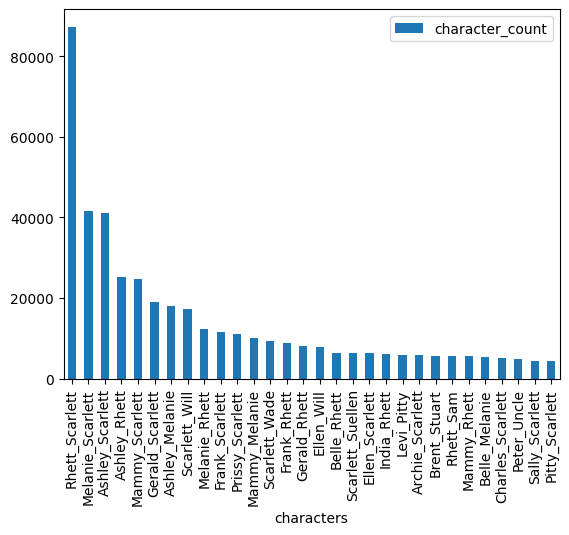

In [ ]:
convo_df.groupby(['characters']).agg({'character_count': 'sum'}).sort_values(by='character_count', ascending=False).head(n=30).plot(kind = "bar")

In [ ]:
main_interactions  = ["Rhett_Scarlett", "Ashley_Scarlett", "Melanie_Scarlett", "Gerald_Scarlett"]

In [ ]:
main_characters = ["Scarlett", "Rhett", "Ashley", "Gerald", "Melanie"]

In [ ]:
convo_df_main = convo_df.loc[convo_df['characters'].isin(main_interactions), :].reset_index(drop = True)

<Axes: xlabel='characters'>

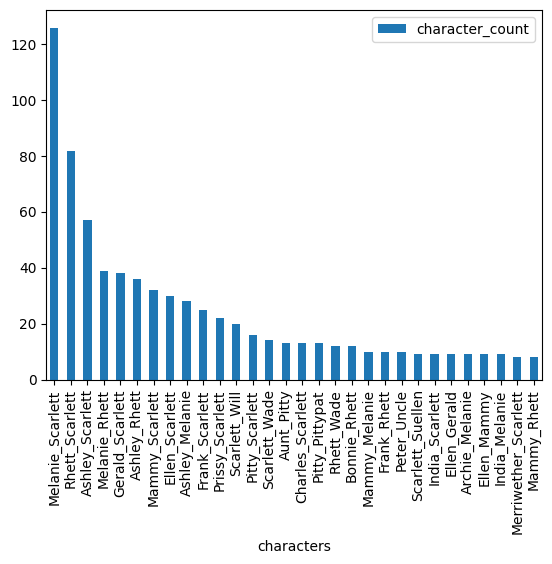

In [ ]:
convo_df.groupby(['characters']).agg({'character_count': 'count'}).sort_values(by='character_count', ascending=False).head(n=30).plot(kind = "bar")

## 5. Pre-process Text for Regressions and LDA


In [5]:
convo_df_main = pd.read_csv("/content/whole_convos.csv")

In [6]:
convo_df_main

Unnamed: 0 Character1 Character2  StartIndex  EndIndex  \
0             0     Gerald   Scarlett          51        51   
1             1    Melanie   Scarlett         327       329   
2             2     Gerald   Scarlett         335       337   
3             3   Scarlett     Gerald         359       361   
4             4   Scarlett     Gerald         363       373   
..          ...        ...        ...         ...       ...   
298         298   Scarlett    Melanie       12637     12649   
299         299    Melanie   Scarlett       12653     12653   
300         300   Scarlett    Melanie       12733     12737   
301         301   Scarlett      Rhett       12791     12885   
302         302     Ashley   Scarlett       12887     12897   

                                              text_out        characters  \
0    "Be careful!  Be careful!  We had you once.  W...   Gerald_Scarlett   
1    "Scarlett, I have something so important\nto t...  Melanie_Scarlett   
2    "There's none in the County can touch you, nor...   Gerald_Scarlett   
3    "And the only reason you\nbought her was becau...   Gerald_Scarlett   
4    "How are they all over at Twelve Oaks?""About ...   Gerald_Scarlett   
..                                                 ...               ...   
298  "Good night,""Promise me--""Anything, darling....  Melanie_Scarlett   
299       "Melly is the only woman friend I ever had,"  Melanie_Scarlett   
300  "I don't want a word out of either of you.""I ...  Melanie_Scarlett   
301  "So she's dead.  That makes it nice for you, d...    Rhett_Scarlett   
302  "But love can't wear out!""Yours for Ashley di...   Ashley_Scarlett   

     character_count  
0                 73  
1                173  
2                 75  
3                306  
4                748  
..               ...  
298              162  
299               44  
300              516  
301             3383  
302             1702  

[303 rows x 8 columns]

In [54]:
df_fewshot_examples_wholeconvo = convo_df_main.groupby('characters', group_keys=False)\
          .apply(select_equal_groups, 5).sample(frac=1, random_state=42).reset_index(drop=True)

In [57]:
def convert_df_to_few_shot(df):
    few_shot_string = ""
    for index, row in df.iterrows():
        text = row['text_out']
        characters = row['characters']
        few_shot_string += f"Character: {characters}\nConversation: {text}\n\n"
    return few_shot_string

In [58]:
fewshot_string_out_full = convert_df_to_few_shot(df_fewshot_examples_wholeconvo)

In [59]:
# Write the resulting string to a text file
with open("fewshot_examples_all_convos.txt", "w") as file:
      file.write(fewshot_string_out_full)

In [7]:
tokenizer_reg = nltk.RegexpTokenizer(r"\w+")

In [8]:
from nltk.tokenize import sent_tokenize, word_tokenize

### 5.1 Clean text from stopwords and other irrelevant words

In [10]:
import pandas as pd

# Load the Excel file into a pandas DataFrame
df = pd.read_excel('possible_reduced_characters_v2 (1).xlsx', header=None)

# Filter the DataFrame to exclude rows where the third column contains "remove"
filtered_df = df[df.iloc[:, 2] != 'remove']

# Extract unique character names from the first column
character_names_all = filtered_df.iloc[:, 1].unique()

row_to_remove = 0
if row_to_remove < len(character_names_all):
    character_names_all = list(character_names_all)
    character_names_all.pop(row_to_remove)

# Print the extracted character names
print(character_names_all)

['Rosa', 'Watling', 'Kill Ashley', 'Darcy', 'Ulster', 'Scarlert', 'Eugenie Victoria', 'Jeff\nDavis', 'Tell Mammy', 'Merriwether', 'Jack', 'Munroe', 'Scarlett', 'Mama Fontaine', 'Pauline', 'Dan Tucker', 'Unless Ashley', 'Buck Munroe', 'Fortunately Scarlett', 'Butler', 'Mick', 'Katie\nScarlett', 'Pharisees', 'Poke', 'Pitty', 'Big Sam', 'Sue', 'Bullock', 'Damn Prissy', 'Susan Elinor', 'Sarah Jane', 'Sam', 'Phil', 'Melly', 'Nathan Bedford Forrest', 'Sometimes Frank', 'Pierre Robillard', 'All Scarlett', 'Benteen', 'Bub', 'Mellie', 'Melanie', 'McRae', 'Johnson', 'Tarleton', 'Henry', 'Burdens', 'Paul Wilson', 'Generally Scarlett', 'Doc Fontaine', 'Dalton', 'Andy Bonnell', 'Suellen', 'Mammy, Cookie', 'Betsy', 'Small Carreen', 'Brown', 'Morgan', 'Wade', 'Calverts', 'Philip', 'Emmie', 'Kennedy', 'Jonas', 'Slattery', 'Betty', 'Bulloch', 'Off Scarlett', 'Calvert', 'Jane', 'Jerry', 'Dilcey', 'Mel--', 'Brenton', 'Yankee Hilton', 'Cathleen', 'Mees Scarlett', 'Tom', 'Mammy--Mammy', 'Wheeler', 'Alex.',

In [11]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
tokenizer_reg = nltk.RegexpTokenizer(r"\w+")
import spacy

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Manually add additional stopwords
additional_stopwords = [name.lower() for name in character_names_all]
custom_list_of_extra_stopwords = ["n't", "'s", "'m", "'ve", "'em", "'ll", "'t", "'d", "us", "'re", "there's", "there're", "they'd", "they've", "'twill", "s", "oh", "ca", "wo", "n", "y"]
# Combine NLTK stopwords with additional stopwords
all_stopwords = set(stopwords.words('english') + custom_list_of_extra_stopwords)

#lemmatize words
def lemmatize_tokens(text):
    doc = nlp(text)
    lemmatized_tokens = [token.lemma_ for token in doc]
    return lemmatized_tokens

# Load the spaCy model
nlp = spacy.load("en_core_web_sm")

def remove_verbs(text):
    # Process the text with spaCy
    doc = nlp(text)

    # Filter out tokens that are verbs
    result = [token.text for token in doc if token.pos_ != "VERB"]

    # Join the remaining tokens back into a string
    return " ".join(result)


# Define a function to remove stopwords from text
def remove_stopwords(text):

    # 1. Tokenize the text to remove stopwords
    text_tokens = word_tokenize(text)
    tokens_without_sw = [word for word in text_tokens if not word.lower() in all_stopwords]
    # Join tokens back into a string
    text = ' '.join(tokens_without_sw)
    print(text)


    #2. Remove punctuation
    tokens_without_punct = tokenizer_reg.tokenize(text.lower())

    text = ' '.join(tokens_without_punct)
    print(text)

    #punctuation_pattern = re.compile(r'[^\w\s]')
    # Remove punctuation marks from the text
    #text = punctuation_pattern.sub(' ', text.lower())

    #3. Remove names
    for substring in additional_stopwords:
        text = text.replace(substring, '')
    print(text)

    #4. Lemmatize text
    lemma_text = " ".join(lemmatize_tokens(text))
    print(text)

    return lemma_text


# Assuming convo_df_main is your DataFrame and 'text_out' is the column containing text
# Apply the remove_stopwords function to the 'text_out' column
#convo_df_main['text_out_processed'] = convo_df_main['text_out'].apply(remove_stopwords)
#convo_df_main['text_out_wo_verbs'] = convo_df_main['text_out'].apply(remove_verbs)
#convo_df_main['text_woverbs_processed'] = convo_df_main['text_out_wo_verbs'].apply(remove_stopwords)

# Print the DataFrame to see the result
#convo_df_main.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [12]:
convo_df_main['text_out_wo_verbs'] = convo_df_main['text_out'].apply(remove_verbs)

In [13]:
def chunk_text(text, min_tokens=20, max_tokens=50):
    sentences = sent_tokenize(text)
    chunks = []
    current_chunk = []
    current_chunk_length = 0

    for sentence in sentences:
        sentence_tokens = tokenizer_reg.tokenize(sentence)
        sentence_length = len(sentence_tokens)

        # Check if adding the current sentence would exceed the max token limit
        if current_chunk_length + sentence_length > max_tokens:
            # If the current chunk has enough tokens, finalize it and start a new chunk
            if current_chunk_length >= min_tokens:
                chunks.append(' '.join(current_chunk))
                current_chunk = sentence_tokens
                current_chunk_length = sentence_length
            else:
                # If the current chunk doesn't have enough tokens, keep adding sentences until it does
                current_chunk.extend(sentence_tokens)
                current_chunk_length += sentence_length
        else:
            # Add the sentence to the current chunk
            current_chunk.extend(sentence_tokens)
            current_chunk_length += sentence_length

    # Add the last chunk if it has any sentences
    if current_chunk:
        chunks.append(' '.join(current_chunk))

    return chunks


chunks_LR_Ashley = chunk_text(" ".join(convo_df_main['text_out'][convo_df_main['characters']== "Ashley_Scarlett"].tolist()), min_tokens = 10, max_tokens = 50)
chunks_TM_Ashley = chunk_text(" ".join(convo_df_main['text_out_wo_verbs'][convo_df_main['characters']== "Ashley_Scarlett"].tolist()), min_tokens = 50, max_tokens = 100)

In [14]:
chunks_LR_Gerald = chunk_text(" ".join(convo_df_main['text_out'][convo_df_main['characters']== "Gerald_Scarlett"].tolist()), min_tokens = 10, max_tokens = 50)
chunks_TM_Gerald = chunk_text(" ".join(convo_df_main['text_out_wo_verbs'][convo_df_main['characters']== "Gerald_Scarlett"].tolist()), min_tokens = 50, max_tokens = 100)

In [15]:
chunks_LR_Rhett = chunk_text(" ".join(convo_df_main['text_out'][convo_df_main['characters']== "Rhett_Scarlett"].tolist()), min_tokens = 10, max_tokens = 50)
chunks_TM_Rhett = chunk_text(" ".join(convo_df_main['text_out_wo_verbs'][convo_df_main['characters']== "Rhett_Scarlett"].tolist()), min_tokens = 50, max_tokens = 100)

In [16]:
# Assuming convo_df_main is your DataFrame and 'text_out' is the column containing text
# Apply the remove_stopwords function to the 'text_out' column
processed_LR_Ashley = [remove_stopwords(chunk) for chunk in chunks_LR_Ashley]
processed_TM_Ashley = [remove_stopwords(chunk) for chunk in chunks_TM_Ashley]

Ashley idea love could know always acted prissy ladylike touch around probably thinks care thing except friend
ashley idea love could know always acted prissy ladylike touch around probably thinks care thing except friend
ley idea love could know always acted y ladylike touch around probably thinks care thing except friend
ley idea love could know always acted y ladylike touch around probably thinks care thing except friend
Yes never spoken thinks love hopeless looked broken hearted thinks love Brent Stuart Cade
yes never spoken thinks love hopeless looked broken hearted thinks love brent stuart cade
yes never sn thinks love hopeless looked broken hearted thinks love  art cade
yes never sn thinks love hopeless looked broken hearted thinks love  art cade
probably thinks might well please family marry Melanie knew love fool think till
probably thinks might well please family marry melanie knew love fool think till
probably thinks might well please family marry  knew love fool think till


In [17]:
processed_LR_Rhett = [remove_stopwords(chunk) for chunk in chunks_LR_Rhett]
processed_TM_Rhett = [remove_stopwords(chunk) for chunk in chunks_TM_Rhett]

husband dead long yes long time Almost year aeon sure married long Forgive questions away section long Two months tragedy less Pompous goat
husband dead long yes long time almost year aeon sure married long forgive questions away section long two months tragedy less pompous goat
husband dead long yes long time almost year aeon sure married long forgive questions away section long two months tragedy less pompous goat
husband dead long yes long time almost year aeon sure married long forgive questions away section long two months tragedy less pompous goat
things enough good ladies hospital committee whose cool hands soothed many suffering brow brought back jaws death brave men wounded bravest Causes know needs enumerate
things enough good ladies hospital committee whose cool hands soothed many suffering brow brought back jaws death brave men wounded bravest causes know needs enumerate
things enough good ladies hospital committee whose cool hands soothed many suffering brow brought back j

In [18]:
processed_LR_Gerald = [remove_stopwords(chunk) for chunk in chunks_LR_Gerald]
processed_TM_Gerald= [remove_stopwords(chunk) for chunk in chunks_TM_Gerald]

careful careful take back none County touch state Well Missy reason bought Dilcey asked buy Well
careful careful take back none county touch state well missy reason bought dilcey asked buy well
careful careful take back none county touch state well missy reason bought  asked buy well
careful careful take back none county touch state well missy reason bought  asked buy well
use buying Dilcey going mope child Well never let darky place marry expensive Well come Puss let go supper
use buying dilcey going mope child well never let darky place marry expensive well come puss let go supper
use buying  going mope child well never let darky place marry expensive well come puss let go supper
use buying  going mope child well never let darky place marry expensive well come puss let go supper
Twelve Oaks usual Cade Calvert settled Dilcey set gallery several toddies
twelve oaks usual cade calvert settled dilcey set gallery several toddies
twelve oaks usual cade  settled  set gallery several toddies

In [19]:
chunks_LR_Melanie = chunk_text(" ".join(convo_df_main['text_out'][convo_df_main['characters']== "Melanie_Scarlett"].tolist()), min_tokens = 10, max_tokens = 70)
chunks_TM_Melanie = chunk_text(" ".join(convo_df_main['text_out_wo_verbs'][convo_df_main['characters']== "Melanie_Scarlett"].tolist()), min_tokens = 50, max_tokens = 100)

In [20]:
processed_LR_Melanie = [remove_stopwords(chunk) for chunk in chunks_LR_Melanie]
processed_TM_Melanie= [remove_stopwords(chunk) for chunk in chunks_TM_Melanie]

Scarlett something important tell hardly know say nearly home time Scarlett coward Put tray come lace tighter try eat little afterwards ate lace tight enough
scarlett something important tell hardly know say nearly home time scarlett coward put tray come lace tighter try eat little afterwards ate lace tight enough
 something important tell hardly know say nearly home time  coward put tray come lace tighter try eat little afterwards ate lace tight enough
 something important tell hardly know say nearly home time  coward put tray come lace tighter try eat little afterwards ate lace tight enough
fear agree Mr Thackeray works cynic fear gentleman Mr Dickens wonderful ever think things little ole brain would bust even tried think really say
fear agree mr thackeray works cynic fear gentleman mr dickens wonderful ever think things little ole brain would bust even tried think really say
fear agree mr thackeray works cynic fear gentleman mr dickens wonderful ever think things little ole brain w

In [21]:
chunks_LR_Ashley

['Why Ashley hasn t an idea that I m in love with him How could he know I ve always acted so prissy and ladylike and touch me not around him he probably thinks I don t care a thing about him except as a friend',
 'Yes that s why he s never spoken He thinks his love is hopeless And that s why he s looked so He s been broken hearted because he thinks I m in love with Brent or Stuart or Cade',
 'And probably he thinks that if he can t have me he might as well please his family and marry Melanie But if he knew I did love him Oh What a fool I ve been not to think of this till now',
 'I must think of some way to let him know He wouldn t marry her if he knew I loved him How could he I ll remember how beautiful this day is till I die Perhaps it will be my wedding day',
 'If I can just live through this barbecue till this afternoon Of course he has to be attentive to Melanie because after all she is his cousin and she isn t popular at all and if he didn t look out for her she d just be a wallfl

In [22]:
processed_LR_Ashley

['ley idea love could know always act y ladylike touch around probably think care thing except friend',
 'yes never sn think love hopeless look break hearted think love   art cade',
 'probably think might well please family marry   know love fool think till',
 'must think way let know marry know love could remember tiful day till die perhaps wedding day',
 'live barbecue till afternoon course attentive   cousin popular look wallflower',
 'let hot headed let war misery world cause war war one ever know',
 'baby house want good time jine cavalry dear wife dixie forgive say   know love mad',
 'silly go porch something   cry gentleman georgia troop well get along without georgian perhaps old march ride shoot',
 'mrs   kindly lend   well mount hope nothing happen   something happen could never go home face mrs    last horse leave',
 'mother father girl well send love father nearly come today pa pa go war',
 'course walk far stiff knee ride away mother agree provide able jump pare fence say 

Now this data can be vectorized:

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range = (1, 3), max_df=0.9)

In [24]:
df_LR_Ashley = pd.DataFrame(data = {'text_out_processed' : processed_LR_Ashley,  'characters': "Ashley_Scarlett"})
df_LR_Gerald = pd.DataFrame(data = {'text_out_processed' : processed_LR_Gerald,  'characters': "Gerald_Scarlett"})
df_LR_Melanie = pd.DataFrame(data = {'text_out_processed' : processed_LR_Melanie,  'characters': "Melanie_Scarlett"})
df_LR_Rhett = pd.DataFrame(data = {'text_out_processed' : processed_LR_Rhett,  'characters': "Rhett_Scarlett"})

df_main_chunked = pd.concat([df_LR_Ashley, df_LR_Gerald, df_LR_Melanie, df_LR_Rhett]).sample(frac=1, random_state=42).reset_index(drop=True)

In [25]:
df_main_chunked['characters'].value_counts()

characters
Rhett_Scarlett      410
Ashley_Scarlett     196
Melanie_Scarlett    136
Gerald_Scarlett      85
Name: count, dtype: int64

As there is a class imbalance, we first want to select 30 real observations from each group, and then augment the training classes through SMOTE:

In [26]:
def select_equal_groups(group: pd.core.groupby.generic.DataFrameGroupBy, n: int):
    return group.sample(min(n, len(group)), random_state=42)

df_test = df_main_chunked.groupby('characters', group_keys=False)\
          .apply(select_equal_groups, 40)

In [27]:
df_train = df_main_chunked[~df_main_chunked.index.isin(df_test.index)]

In [28]:
print(df_train['characters'].value_counts())
print(df_test['characters'].value_counts())

characters
Rhett_Scarlett      370
Ashley_Scarlett     156
Melanie_Scarlett     96
Gerald_Scarlett      45
Name: count, dtype: int64
characters
Ashley_Scarlett     40
Gerald_Scarlett     40
Melanie_Scarlett    40
Rhett_Scarlett      40
Name: count, dtype: int64


As one class is overbalanced, we want to reduce the majority class to 150 so that for Gerald the oversampling is not too much:

In [29]:
df_train = df_train.groupby('characters', group_keys=False)\
          .apply(select_equal_groups, 140)

In [38]:
df_fewshot_examples = df_train.groupby('characters', group_keys=False)\
          .apply(select_equal_groups, 5).sample(frac=1, random_state=42).reset_index(drop=True)

In [50]:
def convert_df_to_few_shot(df):
    few_shot_string = ""
    for index, row in df.iterrows():
        text = row['text_out_processed']
        characters = row['characters']
        few_shot_string += f"Character: {characters}\nConversation: {text}\n\n"
    return few_shot_string

In [51]:
fewshot_string_out = convert_df_to_few_shot(df_fewshot_examples)

In [52]:
fewshot_string_out

'Character: Ashley_Scarlett\nConversation: yes never sn think love hopeless look break hearted think love   art cade\n\nCharacter: Rhett_Scarlett\nConversation: marry bore fool simply accident prevent get home dark permit wild eyed brother shoot kill could shoot straight\n\nCharacter: Rhett_Scarlett\nConversation: say tell stay home vile creature insinuate poor   would good lord mean run around woman   good lord   good time steady lamp\n\nCharacter: Ashley_Scarlett\nConversation: look back like day well always something exciting happen party everything get glitter old day dull like day well ah   poor liar\n\nCharacter: Gerald_Scarlett\nConversation: use buy   go mope child well never let darky place marry expensive well come puss let go supper\n\nCharacter: Gerald_Scarlett\nConversation: kind queerness easy understand sure grace god   hara would fault mean ley would run another woman wife beat\n\nCharacter: Melanie_Scarlett\nConversation: want go back house sit stand tell story front o

In [53]:
# Write the resulting string to a text file
with open("fewshot_examples_final.txt", "w") as file:
      file.write(fewshot_string_out)

In [30]:
X_train = vectorizer.fit_transform(df_train['text_out_processed'])
X_test = vectorizer.transform(df_test['text_out_processed'])
y_train = df_train.characters.reset_index(drop = True)
y_test = df_test.characters.reset_index(drop = True)

In [31]:
y_train.value_counts()

characters
Ashley_Scarlett     140
Rhett_Scarlett      140
Melanie_Scarlett     96
Gerald_Scarlett      45
Name: count, dtype: int64

In [32]:
y_test.value_counts()

characters
Ashley_Scarlett     40
Gerald_Scarlett     40
Melanie_Scarlett    40
Rhett_Scarlett      40
Name: count, dtype: int64

In [33]:
!pip install imbalanced-learn

In [34]:
from imblearn.over_sampling import SMOTE

def smote_upsampling(X, y):
    """
    Perform SMOTE upsampling on the input features and target labels.

    Parameters:
        X (array-like): Input features.
        y (array-like): Target labels.

    Returns:
        X_resampled (array-like): Resampled features.
        y_resampled (array-like): Resampled target labels.
    """
    # Initialize SMOTE object
    smote = SMOTE()

    # Perform SMOTE upsampling
    X_resampled, y_resampled = smote.fit_resample(X, y)

    return X_resampled, y_resampled

# Example usage:
# X_train and y_train are your training features and labels, respectively
X_train_resampled, y_train_resampled = smote_upsampling(X_train, y_train)

In [35]:
print(y_train_resampled.value_counts())

characters
Ashley_Scarlett     140
Gerald_Scarlett     140
Melanie_Scarlett    140
Rhett_Scarlett      140
Name: count, dtype: int64


##5B. TF-IDF per class statistics

In [ ]:
train_df = pd.DataFrame(X_train.toarray(), columns=vectorizer.get_feature_names_out())
train_df['y'] = y_train

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
grouped_train = train_df.groupby('y').sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Find the most popular tokens for each class
top_tokens_train = {}

for class_label, data in grouped_train.iterrows():
    top_tokens_train[class_label] = data.nlargest(20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
top_tokens_train

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'Ashley_Scarlett': know     2.955806
 ley      2.500245
 go       2.350990
 like     2.220410
 get      2.104646
 well     1.969870
 think    1.827822
 love     1.742139
 never    1.666893
 want     1.589652
 thing    1.546612
 come     1.534258
 war      1.439027
 could    1.436574
 world    1.399328
 fight    1.307149
 let      1.272389
 money    1.253496
 man      1.234156
 back     1.216063
 Name: Ashley_Scarlett, dtype: float64,
 'Gerald_Scarlett': mother      1.178911
 puss        0.927533
 daughter    0.852389
 want        0.773391
 say         0.758081
 would       0.757106
 like        0.756760
 die         0.752701
 know        0.751712
 come        0.732787
 orrow       0.681274
 thing       0.673924
 well        0.660356
 marry       0.654211
 tis         0.644284
 pa          0.643225
 make        0.599268
 man         0.567724
 sure        0.563482
 house       0.529941
 Name: Gerald_Scarlett, dtype: float64,
 'Melanie_Scarlett': go         2.265639
 get        2.193408


In [ ]:
from collections import Counter

# Combine all the tokens from top_tokens_train
all_tokens = []
for class_label, tokens in top_tokens_train.items():
    all_tokens.extend(tokens.index)

# Count the occurrences of each token
token_counts = Counter(all_tokens)

# Convert the Counter object to a set
token_set = set(token_counts.items())

print("Set of all tokens and their counts:")
print(token_set)

Set of all tokens and their counts:
{('money', 2), ('orrow', 1), ('old', 1), ('make', 2), ('thing', 2), ('take', 1), ('sure', 1), ('let', 2), ('look', 1), ('house', 1), ('puss', 1), ('dear', 1), ('say', 3), ('world', 1), ('home', 2), ('must', 1), ('back', 1), ('one', 1), ('yankee', 1), ('baby', 1), ('never', 3), ('darling', 1), ('come', 3), ('marry', 1), ('daughter', 1), ('see', 1), ('well', 4), ('tis', 1), ('man', 2), ('think', 3), ('yes', 1), ('tell', 1), ('like', 3), ('would', 2), ('know', 4), ('want', 3), ('pa', 1), ('mother', 1), ('ley', 2), ('die', 2), ('get', 3), ('time', 1), ('go', 3), ('could', 3), ('war', 1), ('fight', 1), ('love', 1)}


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
common_tokens = {token: count for token, count in token_set if count > 1}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import numpy as np

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
common_tokens

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'money': 2,
 'make': 2,
 'thing': 2,
 'let': 2,
 'say': 3,
 'home': 2,
 'never': 3,
 'come': 3,
 'well': 4,
 'man': 2,
 'think': 3,
 'like': 3,
 'would': 2,
 'know': 4,
 'want': 3,
 'ley': 2,
 'die': 2,
 'get': 3,
 'go': 3,
 'could': 3}

In [ ]:
# Remove common tokens from the vectorizers
common_tokens_indices = [vectorizer.vocabulary_[token] for token in common_tokens]
#vectorizer.vocabulary_ = {token: index for token, index in vectorizer.vocabulary_.items() if index not in common_tokens_indices}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
X_train_resampled.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(560, 15105)

In [ ]:
len(vectorizer.vocabulary_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


15105

In [ ]:
#X_train_resampled = np.delete(X_train_resampled.toarray(), common_tokens_indices, axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#X_test= np.delete(X_test.toarray(), common_tokens_indices, axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
#from scipy.sparse import csr_matrix
#X_train_resampled = csr_matrix(X_train_resampled)
#X_test_resampled = csr_matrix(X_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
top_tokens_train['Ashley_Scarlett']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


know     2.955806
ley      2.500245
go       2.350990
like     2.220410
get      2.104646
well     1.969870
think    1.827822
love     1.742139
never    1.666893
want     1.589652
thing    1.546612
come     1.534258
war      1.439027
could    1.436574
world    1.399328
fight    1.307149
let      1.272389
money    1.253496
man      1.234156
back     1.216063
Name: Ashley_Scarlett, dtype: float64

In [ ]:
top_tokens_train['Melanie_Scarlett']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


go         2.265639
get        2.193408
think      1.969465
know       1.966874
baby       1.899394
come       1.533014
darling    1.487186
ley        1.361528
look       1.350876
say        1.316405
take       1.272467
home       1.229340
well       1.217727
dear       1.212428
die        1.198631
must       1.176882
never      1.130322
could      1.055596
time       1.051964
yes        1.029944
Name: Melanie_Scarlett, dtype: float64

In [ ]:
top_tokens_train['Rhett_Scarlett']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


go        2.211415
know      2.134135
think     2.068709
get       1.999081
want      1.893219
say       1.883507
never     1.860479
money     1.801650
would     1.786683
like      1.691200
well      1.595529
tell      1.527977
one       1.495099
see       1.445608
make      1.392064
yankee    1.337715
let       1.282357
could     1.254966
home      1.178778
old       1.142018
Name: Rhett_Scarlett, dtype: float64

In [ ]:
top_tokens_train['Gerald_Scarlett']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


mother      1.178911
puss        0.927533
daughter    0.852389
want        0.773391
say         0.758081
would       0.757106
like        0.756760
die         0.752701
know        0.751712
come        0.732787
orrow       0.681274
thing       0.673924
well        0.660356
marry       0.654211
tis         0.644284
pa          0.643225
make        0.599268
man         0.567724
sure        0.563482
house       0.529941
Name: Gerald_Scarlett, dtype: float64

##6. Logistic Regression


We perform a GridSearch on the training data

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

#make a list of parameters:
param_grid = {
    'C': [10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']# Penalty term
}

# Initialize and fit logistic regression model
logreg = LogisticRegression(max_iter=1000)
gridsearch = GridSearchCV(logreg, param_grid, cv=KFold(5, shuffle=True, random_state=42), verbose=2, n_jobs=-1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
gridsearch.fit(X_train_resampled, y_train_resampled)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             verbose=2)

Then we take the best results of the grisearch and fit it to the model:

In [ ]:
cv_results_df = pd.DataFrame(gridsearch.cv_results_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
cv_results_df.sort_values(by='mean_test_score', ascending=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
7       1.113749      0.259193         0.002122        0.000080     100   
2       0.098450      0.013714         0.002093        0.000453      10   
3       0.862324      0.291360         0.003539        0.002896      10   
6       0.029099      0.001013         0.001661        0.000042     100   
5      14.150555      3.045048         0.002328        0.000337     100   
0      13.550057     26.311444         0.008719        0.005315      10   
4       0.323027      0.122137         0.002390        0.000652     100   
1      14.249113      3.351947         0.006585        0.006651      10   

  param_penalty param_solver  \
7            l2         saga   
2            l2    liblinear   
3            l2         saga   
6            l2    liblinear   
5            l1         saga   
0            l1    liblinear   
4            l1    liblinear   
1            l1         saga   

                                              params  split0_test_score  \
7      {'C': 100, 'penalty': 'l2', 'solver': 'saga'}           0.723214   
2  {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}           0.705357   
3       {'C': 10, 'penalty': 'l2', 'solver': 'saga'}           0.705357   
6  {'C': 100, 'penalty': 'l2', 'solver': 'libline...           0.714286   
5      {'C': 100, 'penalty': 'l1', 'solver': 'saga'}           0.705357   
0  {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}           0.669643   
4  {'C': 100, 'penalty': 'l1', 'solver': 'libline...           0.696429   
1       {'C': 10, 'penalty': 'l1', 'solver': 'saga'}           0.651786   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
7           0.732143           0.714286           0.696429           0.669643   
2           0.741071           0.705357           0.705357           0.660714   
3           0.723214           0.705357           0.705357           0.669643   
6           0.732143           0.714286           0.696429           0.642857   
5           0.696429           0.669643           0.660714           0.678571   
0           0.687500           0.705357           0.669643           0.660714   
4           0.696429           0.687500           0.633929           0.669643   
1           0.696429           0.669643           0.607143           0.705357   

   mean_test_score  std_test_score  rank_test_score  
7         0.707143        0.022160                1  
2         0.703571        0.025505                2  
3         0.701786        0.017496                3  
6         0.700000        0.030723                4  
5         0.682143        0.016560                5  
0         0.678571        0.015972                6  
4         0.676786        0.023555                7  
1         0.666071        0.035084                8

In [ ]:
logregfinal = LogisticRegression(max_iter = 1000, solver = "liblinear", penalty = "l2", C = 10)
logregfinal.fit(X_train_resampled, y_train_resampled)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LogisticRegression(C=10, max_iter=1000, solver='liblinear')

In [ ]:
y_pred = logregfinal.predict(X_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
y_pred

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['Ashley_Scarlett', 'Melanie_Scarlett', 'Melanie_Scarlett',
       'Rhett_Scarlett', 'Ashley_Scarlett', 'Ashley_Scarlett',
       'Rhett_Scarlett', 'Ashley_Scarlett', 'Rhett_Scarlett',
       'Ashley_Scarlett', 'Rhett_Scarlett', 'Ashley_Scarlett',
       'Melanie_Scarlett', 'Ashley_Scarlett', 'Ashley_Scarlett',
       'Rhett_Scarlett', 'Ashley_Scarlett', 'Melanie_Scarlett',
       'Melanie_Scarlett', 'Melanie_Scarlett', 'Melanie_Scarlett',
       'Melanie_Scarlett', 'Melanie_Scarlett', 'Ashley_Scarlett',
       'Ashley_Scarlett', 'Ashley_Scarlett', 'Ashley_Scarlett',
       'Rhett_Scarlett', 'Ashley_Scarlett', 'Rhett_Scarlett',
       'Ashley_Scarlett', 'Ashley_Scarlett', 'Ashley_Scarlett',
       'Ashley_Scarlett', 'Ashley_Scarlett', 'Ashley_Scarlett',
       'Melanie_Scarlett', 'Ashley_Scarlett', 'Ashley_Scarlett',
       'Melanie_Scarlett', 'Rhett_Scarlett', 'Rhett_Scarlett',
       'Gerald_Scarlett', 'Gerald_Scarlett', 'Rhett_Scarlett',
       'Rhett_Scarlett', 'Gerald_Scarle

In [ ]:
from sklearn.metrics import classification_report

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(classification_report(y_test, y_pred))

                  precision    recall  f1-score   support

 Ashley_Scarlett       0.55      0.55      0.55        40
 Gerald_Scarlett       1.00      0.28      0.43        40
Melanie_Scarlett       0.53      0.82      0.65        40
  Rhett_Scarlett       0.43      0.50      0.46        40

        accuracy                           0.54       160
       macro avg       0.63      0.54      0.52       160
    weighted avg       0.63      0.54      0.52       160



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
!pip install eli5

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import eli5
eli5.show_weights(logregfinal, feature_names = vectorizer.get_feature_names_out())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Check the results of the performance

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, recall_score, f1_score, precision_score

default_metrics = {
    'accuracy': accuracy_score,
    'recall': lambda y_t, y_p: recall_score(y_t, y_p, zero_division="warn", average='micro'),
    'precision': lambda y_t, y_p: precision_score(y_t, y_p, zero_division="warn", average='micro'),
    'f1': lambda y_t, y_p: f1_score(y_t, y_p, zero_division= "warn", average ='macro')
}


def plot_accuracy(df, metrics):
    y_true = df['characters']
    y_pred = df['prediction']

    # Plot count confusion matrix
    cm_disp = ConfusionMatrixDisplay.from_predictions(y_true, y_pred)

    # Show plot
    plt.show()

    # Calculate metrics
    metrics = {metric_name: metric_func(y_true, y_pred) for metric_name, metric_func in metrics.items()}
    print(metrics)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


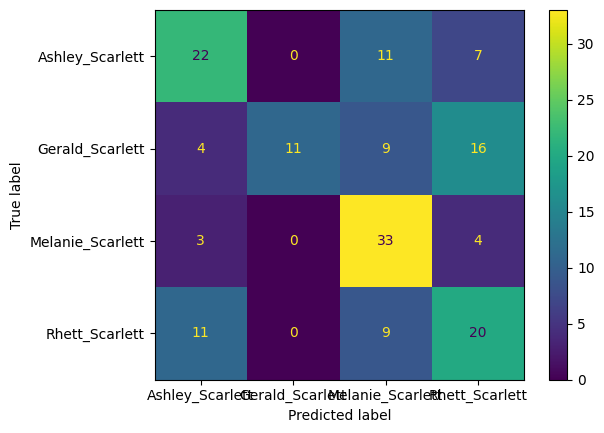

{'accuracy': 0.5375, 'recall': 0.5375, 'precision': 0.5375, 'f1': 0.522050371872887}


In [ ]:
df_test['prediction'] = y_pred
plot_accuracy(df_test, default_metrics)

In [ ]:
df_test[(df_test['characters'] == "Rhett_Scarlett") & (df_test['prediction'] == "Ashley_Scarlett")]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


index                                 text_out_processed      characters  \
124    161  an hand lip besmirch purity love well yes some...  Rhett_Scarlett   
128    627  day rich power other obvious still care obviou...  Rhett_Scarlett   
129    478  suppose understand like k   lend money reserve...  Rhett_Scarlett   
131    451  long sad cornered never corner    frighten not...  Rhett_Scarlett   
132    584  pay lose tara lose let go tell first instead p...  Rhett_Scarlett   
133    667  must love year fool know   must believe believ...  Rhett_Scarlett   
144    419  get look fool suppose   come see would nne inc...  Rhett_Scarlett   
149    215                 right talk like ley right one else  Rhett_Scarlett   
152    481  yes want money go far stop surely harm discuss...  Rhett_Scarlett   
155      1  day rich man great man like go   seed greatnes...  Rhett_Scarlett   
156    669  go ride last week without glove ruin ride hell...  Rhett_Scarlett   

          prediction  
124  Ashley_Scarlett  
128  Ashley_Scarlett  
129  Ashley_Scarlett  
131  Ashley_Scarlett  
132  Ashley_Scarlett  
133  Ashley_Scarlett  
144  Ashley_Scarlett  
149  Ashley_Scarlett  
152  Ashley_Scarlett  
155  Ashley_Scarlett  
156  Ashley_Scarlett

In [ ]:
df_test = df_test.reset_index()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
eli5.show_prediction(logregfinal, X_test[124], top =20, feature_names = vectorizer.get_feature_names_out())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df_test.loc[124, 'text_out_processed']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


'an hand lip besmirch purity love well yes something like interested pure love nasty  '

## 8. Sentiment Analysis Regression

In [ ]:
from transformers import pipeline
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("lxyuan/distilbert-base-multilingual-cased-sentiments-student", max_length = 512, truncation = True)

distilled_student_sentiment_classifier = pipeline(
    model="lxyuan/distilbert-base-multilingual-cased-sentiments-student",
    tokenizer = tokenizer,
    return_all_scores=True
)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/373 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.92M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/759 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/541M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [ ]:
tokenizer_kwargs = {'truncation':True,'max_length':512}
def sentiment_analysis_score(text):
    if len(text.split(" ")) > 5:
      sentiment_results = distilled_student_sentiment_classifier(text, **tokenizer_kwargs)
      positive_score = sentiment_results[0][0]['score']
      negative_score = sentiment_results[0][2]['score']
      return positive_score - negative_score
    return

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
convo_df_main['sent_score'] = convo_df_main['text_out'].apply(sentiment_analysis_score)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


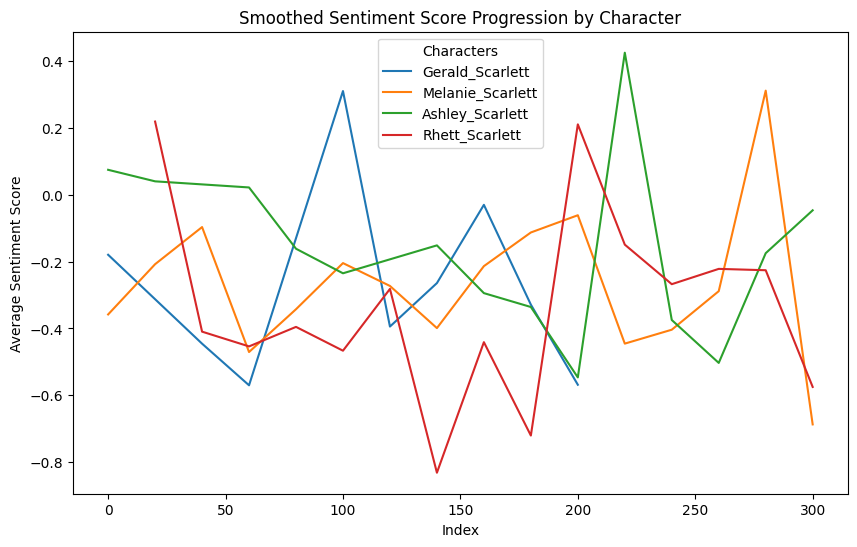

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming convo_df_main is your DataFrame

# Function to bin and average the data
def smooth_data(df, bin_size):
    # Calculate the number of bins
    num_bins = (len(df) + bin_size - 1) // bin_size
    # Group by bin number and calculate mean
    smoothed_df = df.groupby(df.index // bin_size).mean()
    return smoothed_df

# Step 1: Plot the data
plt.figure(figsize=(10, 6))

# Loop through each unique character
for character in convo_df_main['characters'].unique():
    # Filter the data for the current character
    character_data = convo_df_main[convo_df_main['characters'] == character]
    # Smooth the data by averaging over bins of 10
    smoothed_character_data = smooth_data(character_data['sent_score'], 20)
    # Plot the smoothed data
    plt.plot(smoothed_character_data.index * 20, smoothed_character_data, label=character)

# Adding labels and title
plt.xlabel('Index')
plt.ylabel('Average Sentiment Score')
plt.title('Smoothed Sentiment Score Progression by Character')
plt.legend(title='Characters')

# Show the plot
plt.show()

In [ ]:
convo_df_main.groupby(['characters']).agg({'sent_score': 'median'})

sent_score
characters                  
Ashley_Scarlett    -0.372742
Gerald_Scarlett    -0.322369
Melanie_Scarlett   -0.294469
Rhett_Scarlett     -0.356902

<Axes: >

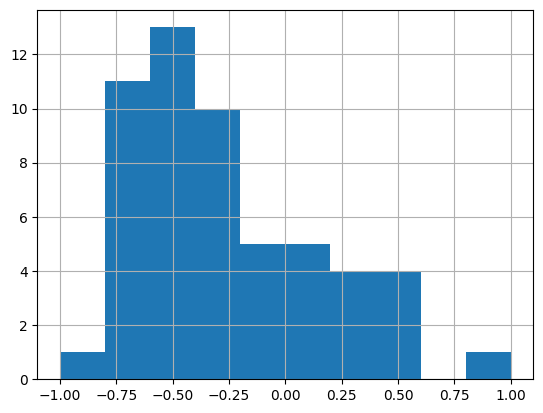

In [ ]:
convo_df_main['sent_score'][convo_df_main['characters'] == "Ashley_Scarlett"].hist(range=[-1, 1])

<Axes: >

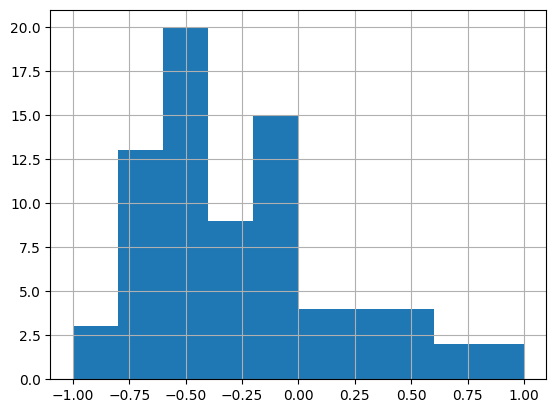

In [ ]:
convo_df_main['sent_score'][convo_df_main['characters'] == "Rhett_Scarlett"].hist(range=[-1, 1])

<Axes: >

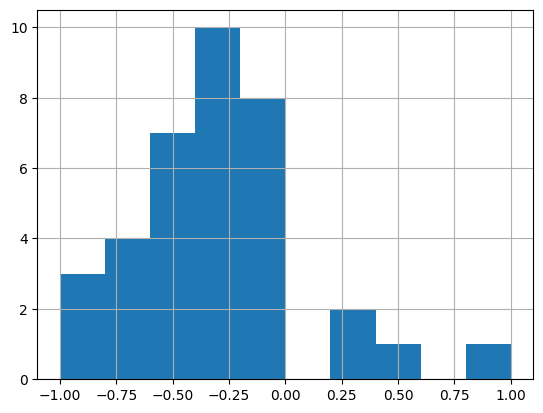

In [ ]:
convo_df_main['sent_score'][convo_df_main['characters'] == "Gerald_Scarlett"].hist(range=[-1, 1])

<Axes: >

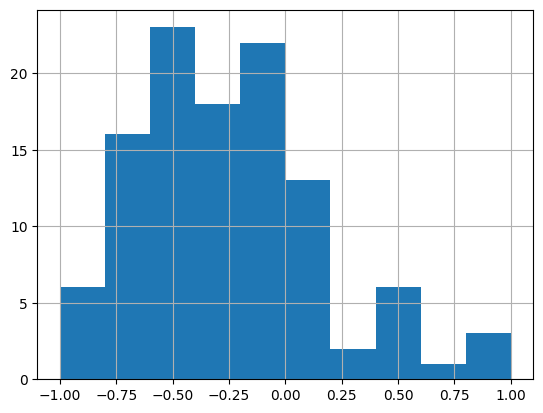

In [ ]:
convo_df_main['sent_score'][convo_df_main['characters'] == "Melanie_Scarlett"].hist(range=[-1, 1])

## 9. LDA

This section shows comparisons of performances of various LDA models.

In [60]:
!pip install gensim

In [74]:
!pip install pyldavis==3.2.1
import pyLDAvis.gensim

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 14.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyldavis: filename=pyLDAvis-3.2.1-py2.py3-none-any.whl size=136163 sha256=470795a68a9dec3060c2828b4dcc6ce324bcf8157d2e9322b64519926544ec0a
  Stored in directory: /root/.cache/pip/wheels/d3/35/9c/c084bb1c3a4b8a7feb32d57c88f572dcf5c3accc949478893f
Successfully built pyldavis
  Attempting uninstall: pyldavis
    Found existing installation: pyLDAvis 3.4.1
    Uninstalling pyLDAvis-3.4.1:
      Successfully uninstalled pyLDAvis-3.4.1


In [75]:
pyLDAvis.enable_notebook()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [62]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from gensim.models.coherencemodel import CoherenceModel

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [78]:
#Function 1 - get data for the LDA model
def prepare_LDA_data(texts_in, no_above = 0.6):
  corpus = [word_tokenize(chunk) for chunk in texts_in]
  dictionary = Dictionary(corpus)
  dictionary.filter_extremes(no_below=2, no_above=no_above)
  bow_corpus = [dictionary.doc2bow(text) for text in corpus]
  return corpus, dictionary, bow_corpus

#Function 2 - run models with coherence scores
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3, alpha='auto', eta='auto'):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, passes=20, num_topics=num_topics, random_state=42, alpha=alpha, eta=eta)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

#Function 3- Print word clouds
# Generate word clouds for each topic
def print_word_clouds(topics):
  for topic_id, topic in topics:
      topic_words = ' '.join([word for word, _ in topic])
      wordcloud = WordCloud(background_color='white').generate(topic_words)

      plt.figure()
      plt.imshow(wordcloud, interpolation='bilinear')
      plt.title(f'Topic {topic_id + 1} Word Cloud')
      plt.axis('off')
      plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Global Topic Modelling

In [66]:
procesed_all

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['  something important hardly nearly home time   coward tray tight little afterwards could tight enough mr thackeray work cynic gentleman mr dicken wonderful ever thing little ole brain would even',
  'really   fast girl could today eavesdropper often highly instructive thing honey unkind high spirited vivacious charming little mess well miss hush honey honey unkind   always busy good people good',
  'glad right   hara ever trouble girl x mighty well art   today mr   ley   must home must home atlanta   pat darling much   wife well',
  'sort stick never popular like thing besides ley anybody least hospital success th   well would better instead one   well   right happy',
  'true scarlet little boy old gentleman lot militia perfectly able rifle ought minute somebody home husband afraid neither rather dead home darling sorry thoughtless cruel mr  ',
  'happy occasion announcement betrothal kind far ton mr   boring matter business mrs wilke town must good disposal must famous    much blo

In [84]:
import random
processed_all = processed_TM_Melanie + processed_TM_Ashley + processed_TM_Rhett + processed_TM_Gerald
random.Random(42).shuffle(processed_all)
corpus_all, dictionary_all, bow_corpus_all = prepare_LDA_data(processed_all)
model_list_all, coherence_values_all = compute_coherence_values(dictionary=dictionary_all, corpus=bow_corpus_all, texts=corpus_all, start=2, limit=12, step=1, alpha="auto", eta="auto")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [85]:
coherence_values_all

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[0.20866462219618825,
 0.19111973046598993,
 0.19910257271508525,
 0.2151823667775777,
 0.22065931719215168,
 0.22023239478100307,
 0.21268695654860292,
 0.23192910263953959,
 0.23744159447913535,
 0.22192922121073788]

In [86]:
topics_all = model_list_all[8].show_topics(num_topics=10, num_words=15, log=False, formatted=False)
topics_all

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  [('money', 0.021065285),
   ('man', 0.019346993),
   ('like', 0.0133021455),
   ('child', 0.012345031),
   ('would', 0.010825032),
   ('well', 0.010643477),
   ('thing', 0.010304752),
   ('road', 0.009773105),
   ('even', 0.009702542),
   ('good', 0.009265007),
   ('around', 0.009117641),
   ('ston', 0.007771552),
   ('surprise', 0.0077711577),
   ('party', 0.0077708415),
   ('confederacy', 0.0077035706)]),
 (1,
  [('like', 0.031101758),
   ('man', 0.020885745),
   ('never', 0.017708624),
   ('well', 0.01750165),
   ('could', 0.016769677),
   ('one', 0.015719974),
   ('thing', 0.01344765),
   ('old', 0.012836143),
   ('would', 0.012196423),
   ('ley', 0.011133116),
   ('good', 0.011020943),
   ('woman', 0.010281411),
   ('always', 0.009169601),
   ('money', 0.009142049),
   ('anything', 0.008787441)]),
 (2,
  [('well', 0.03060358),
   ('home', 0.025757695),
   ('good', 0.019055828),
   ('must', 0.014432231),
   ('yes', 0.012623401),
   ('would', 0.011706955),
   ('miss', 0.01169

In [87]:
vis_all = pyLDAvis.gensim.prepare(model_list_all[8], bow_corpus_all, dictionary_all)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [88]:
vis_all

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.039645  0.022103       1        1  19.450173
6     -0.091025 -0.015952       2        1  15.756581
9     -0.038437 -0.005248       3        1  12.991099
1     -0.015589 -0.016628       4        1  11.517852
5     -0.052684  0.010108       5        1  10.013445
8      0.073348  0.043097       6        1   9.289937
4     -0.039136 -0.076905       7        1   6.868271
0      0.069077  0.129427       8        1   6.505739
3     -0.008128  0.018724       9        1   4.147281
7      0.142220 -0.108728      10        1   3.459622, topic_info=          Term        Freq       Total Category  logprob  loglift
10         ley  107.000000  107.000000  Default  30.0000  30.0000
162      money   98.000000   98.000000  Default  29.0000  29.0000
98       never  112.000000  112.000000  Default  28.0000  28.0000
102      would  141.000000  141.000000  Default  27.0000  27.0000
83   something   38.000000   38.000000  Default  26.0000  26.0000
..         ...         ...         ...      ...      ...      ...
47        like    2.350261  126.492130  Topic10  -4.8388  -0.6216
119       time    1.735941   57.557435  Topic10  -5.1417  -0.1372
390    perhaps    1.592133   15.864983  Topic10  -5.2282   1.0650
14         old    1.592064   48.368103  Topic10  -5.2283  -0.0498
58       wilke    1.592064   38.794227  Topic10  -5.2283   0.1708

[683 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
982       5  0.759774      actor
815       7  0.386423  admirable
815       8  0.386423  admirable
418       1  0.042854     afraid
418       2  0.085708     afraid
...     ...       ...        ...
414       3  0.343395        yet
414       4  0.206037        yet
414       5  0.068679        yet
414       6  0.137358        yet
479       1  0.726031       york

[1585 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 7, 10, 2, 6, 9, 5, 1, 4, 8])

### Melanie_Scarlett

In [ ]:
corpus_Melanie, dictionary_Melanie, bow_corpus_Melanie = prepare_LDA_data(processed_TM_Melanie)
model_list_Melanie, coherence_values_Melanie = compute_coherence_values(dictionary=dictionary_Melanie, corpus=bow_corpus_Melanie, texts=corpus_Melanie, start=2, limit=12, step=1, alpha="auto", eta="auto")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
coherence_values_Melanie

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[0.17952727175941416,
 0.22901639743053556,
 0.2591494971451801,
 0.22212674961892698,
 0.23087233533591958,
 0.21838918089889744,
 0.24552672588365998,
 0.2652560324283886,
 0.24223264516404636,
 0.2578418013588314]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

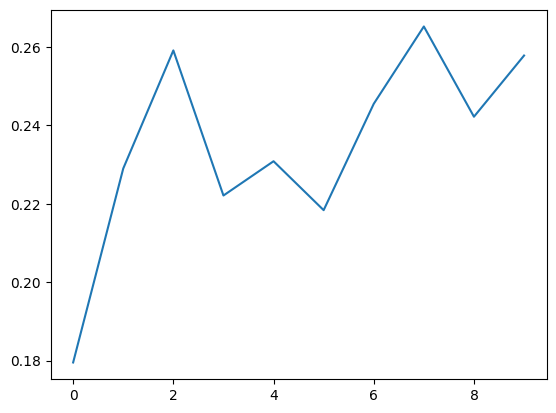

In [ ]:
pd.Series(coherence_values_Melanie).plot()

In [ ]:
topics_Melanie = model_list_Melanie[7].show_topics(num_topics=9, num_words=15, log=False, formatted=False)
topics_Melanie

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  [('ley', 0.03887831),
   ('well', 0.034067173),
   ('never', 0.0292752),
   ('home', 0.027237898),
   ('would', 0.024490526),
   ('baby', 0.022089684),
   ('thing', 0.019695738),
   ('woman', 0.018045135),
   ('right', 0.017105281),
   ('like', 0.016073972),
   ('must', 0.014911831),
   ('poor', 0.014904353),
   ('yes', 0.014904287),
   ('true', 0.01490411),
   ('long', 0.014903614)]),
 (1,
  [('must', 0.037313536),
   ('bad', 0.03367833),
   ('dear', 0.03103266),
   ('please', 0.028972782),
   ('afraid', 0.02741044),
   ('baby', 0.024934115),
   ('god', 0.02422071),
   ('hospital', 0.023332134),
   ('right', 0.022053238),
   ('mrs', 0.0194917),
   ('good', 0.019491468),
   ('course', 0.019479353),
   ('well', 0.01475301),
   ('thing', 0.01475029),
   ('yes', 0.014749713)]),
 (2,
  [('could', 0.05140172),
   ('would', 0.03324559),
   ('like', 0.028890032),
   ('hospital', 0.025173884),
   ('good', 0.022527626),
   ('time', 0.022042572),
   ('lady', 0.020248532),
   ('kind', 0.02

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


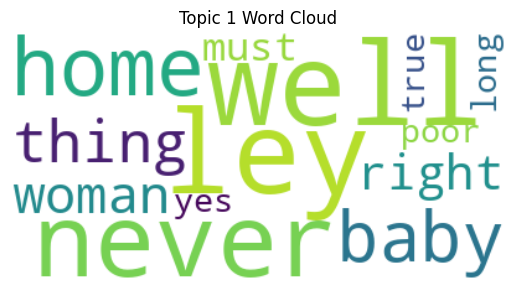

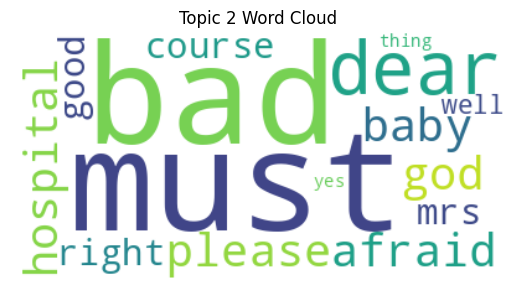

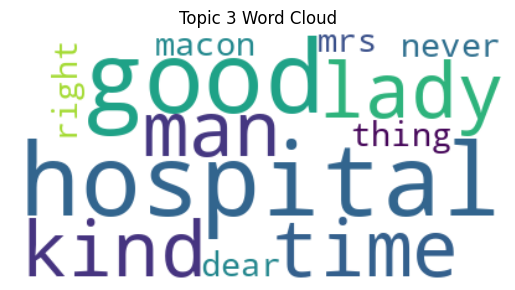

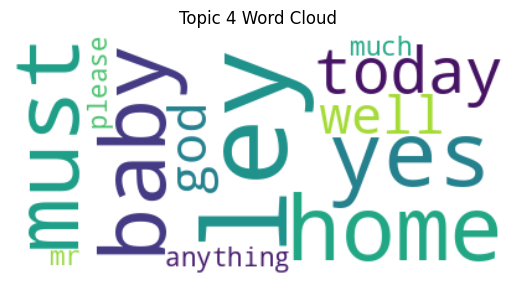

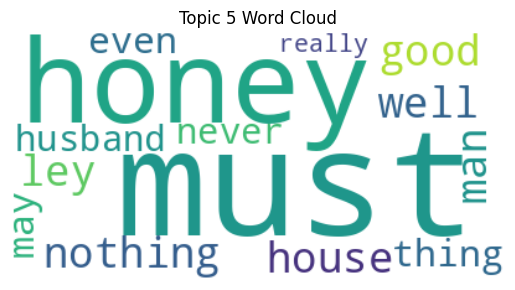

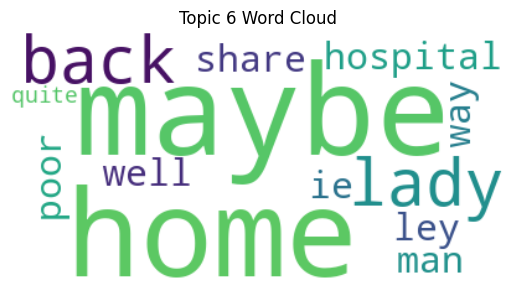

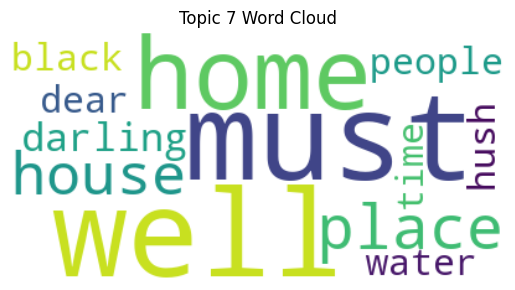

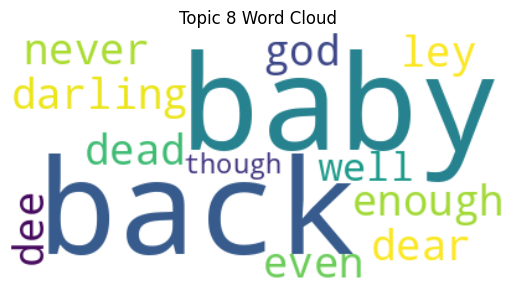

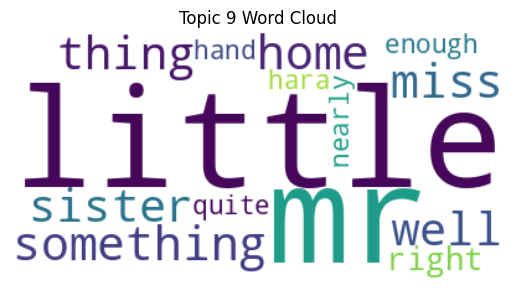

In [ ]:
print_word_clouds(topics_Melanie)

In [ ]:
vis_Melanie = pyLDAvis.gensim.prepare(model_list_Melanie[7], bow_corpus_Melanie, dictionary_Melanie)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
vis_Melanie

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.010607  0.028003       1        1  15.244459
7     -0.103124  0.115014       2        1  14.479092
1      0.129627 -0.009271       3        1  11.919157
0      0.011918  0.065152       4        1  11.709706
2      0.118684  0.067796       5        1  11.327809
4     -0.118759 -0.006578       6        1  10.594641
6     -0.017392 -0.094283       7        1  10.549441
5     -0.030854 -0.046582       8        1   7.705006
8     -0.000708 -0.119252       9        1   6.470688, topic_info=         Term       Freq      Total Category  logprob  loglift
36       must  29.000000  29.000000  Default  30.0000  30.0000
190      baby  25.000000  25.000000  Default  29.0000  29.0000
168       bad  11.000000  11.000000  Default  28.0000  28.0000
43   hospital  14.000000  14.000000  Default  27.0000  27.0000
8      little   9.000000   9.000000  Default  26.0000  26.0000
..        ...        ...        ...      ...      ...      ...
117       bed   0.856215   5.915340   Topic9  -4.7458   0.8051
143   without   0.856215   7.572027   Topic9  -4.7458   0.5582
151      till   0.856215   4.225730   Topic9  -4.7458   1.1415
191       big   0.856215   4.161564   Topic9  -4.7458   1.1568
218     goose   0.856215   3.361948   Topic9  -4.7458   1.3701

[508 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
196       2  0.768994     across
49        1  0.106953     afraid
49        3  0.534765     afraid
49        5  0.106953     afraid
49        7  0.106953     afraid
...     ...       ...        ...
203       1  0.388785  yesterday
203       7  0.388785  yesterday
135       1  0.464684        yet
135       6  0.232342        yet
135       7  0.232342        yet

[769 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 8, 2, 1, 3, 5, 7, 6, 9])

In [ ]:
len(coherence_values)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


18

### Ashley_Scarlett

In [ ]:
corpus_Ashley, dictionary_Ashley, bow_corpus_Ashley = prepare_LDA_data(processed_TM_Ashley)
model_list_Ashley, coherence_values_Ashley = compute_coherence_values(dictionary=dictionary_Ashley, corpus=bow_corpus_Ashley, texts=corpus_Ashley, start=2, limit=12, step=1, alpha="auto", eta="auto")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
np.argmax(coherence_values_Ashley)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


8

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

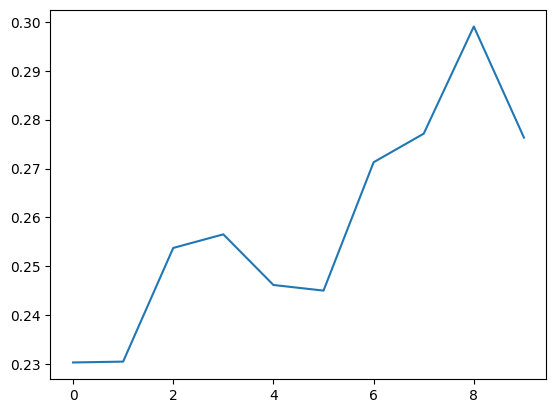

In [ ]:
pd.Series(coherence_values_Ashley).plot()

In [ ]:
topics_Ashley = model_list_Ashley[8].show_topics(num_topics=10, num_words=15, log=False, formatted=False)
topics_Ashley

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  [('child', 0.04882879),
   ('money', 0.039254498),
   ('could', 0.029677179),
   ('one', 0.02967436),
   ('people', 0.026229113),
   ('time', 0.020109527),
   ('right', 0.020109067),
   ('labor', 0.020105882),
   ('convict', 0.020105882),
   ('little', 0.020104358),
   ('long', 0.020103922),
   ('everybody', 0.020096337),
   ('wonder', 0.020090455),
   ('god', 0.020066807),
   ('three', 0.010535324)]),
 (1,
  [('thing', 0.041241273),
   ('well', 0.036149736),
   ('ley', 0.031058853),
   ('people', 0.025968425),
   ('bad', 0.025968226),
   ('war', 0.020876575),
   ('first', 0.020876572),
   ('must', 0.020876572),
   ('man', 0.020876547),
   ('even', 0.020876467),
   ('good', 0.020876396),
   ('would', 0.02087521),
   ('home', 0.015784686),
   ('little', 0.015784672),
   ('darky', 0.015783554)]),
 (2,
  [('ley', 0.043075476),
   ('never', 0.035999224),
   ('back', 0.02895008),
   ('indeed', 0.028941222),
   ('good', 0.021890989),
   ('pa', 0.02188934),
   ('man', 0.021889048),
   

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


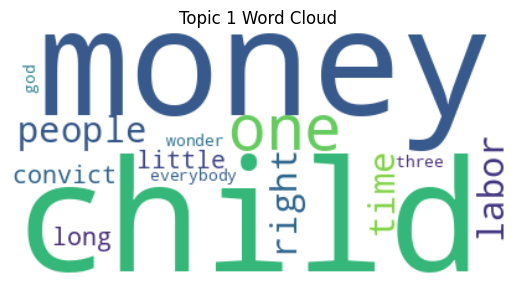

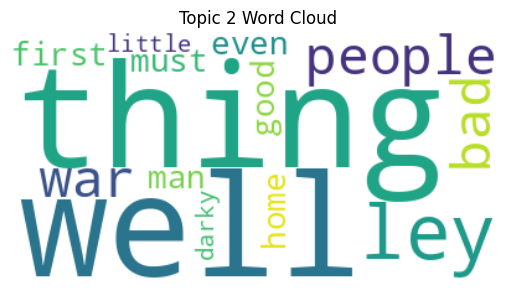

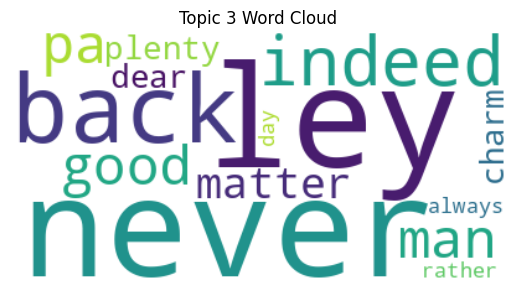

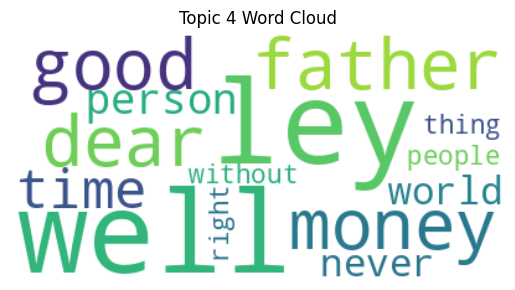

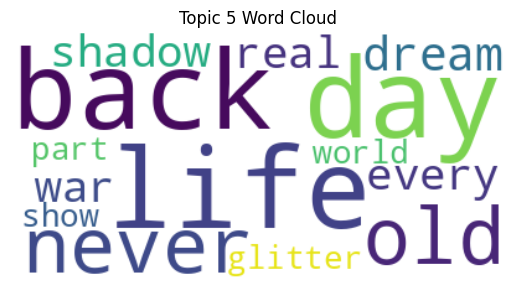

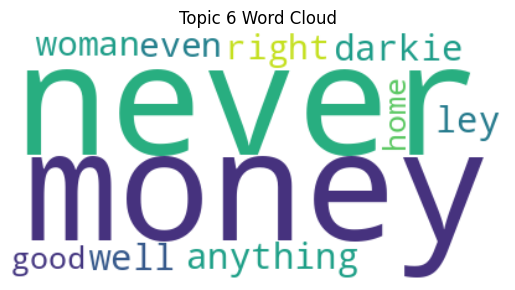

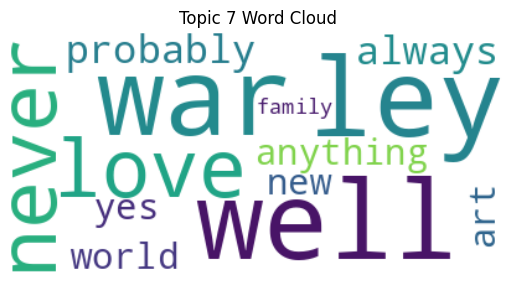

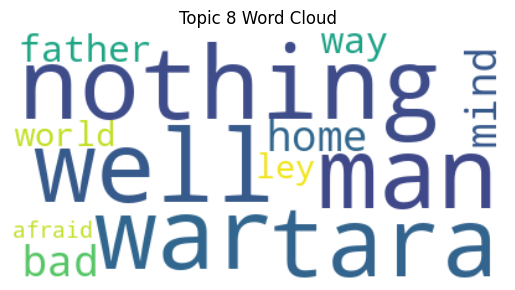

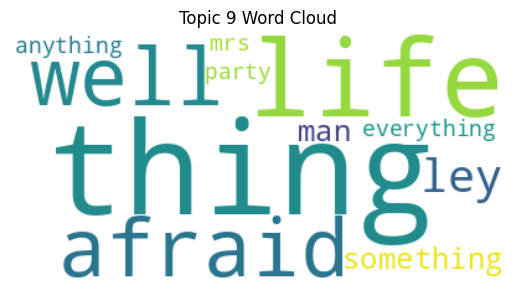

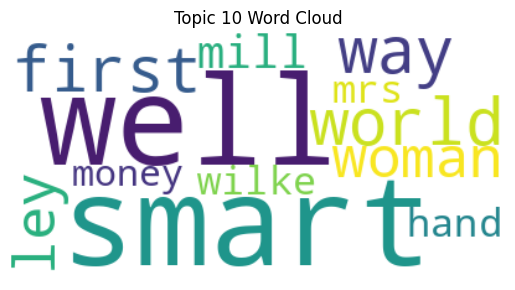

In [ ]:
print_word_clouds(topics_Ashley)

In [ ]:
vis_Ashley = pyLDAvis.gensim.prepare(model_list_Ashley[8], bow_corpus_Ashley, dictionary_Ashley)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
vis_Ashley

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7      0.027706 -0.055368       1        1  14.193304
5      0.096404  0.012510       2        1  13.348245
3      0.009531  0.026291       3        1  13.293733
9      0.073052 -0.112778       4        1  11.952370
1      0.021628 -0.015121       5        1  11.314679
8     -0.061387 -0.001438       6        1  10.061571
4     -0.214599  0.078154       7        1   8.038395
2     -0.017341 -0.062325       8        1   7.675120
0      0.118196  0.181839       9        1   5.186676
6     -0.053188 -0.051764      10        1   4.935907, topic_info=       Term       Freq      Total Category  logprob  loglift
32      war  19.000000  19.000000  Default  30.0000  30.0000
17      day  14.000000  14.000000  Default  29.0000  29.0000
97     life  13.000000  13.000000  Default  28.0000  28.0000
175    back  13.000000  13.000000  Default  27.0000  27.0000
136   money  21.000000  21.000000  Default  26.0000  26.0000
..      ...        ...        ...      ...      ...      ...
154     bad   0.806306  12.735922  Topic10  -4.5145   0.2489
107   heart   0.806306   5.803706  Topic10  -4.5145   1.0348
4    except   0.806306   6.751086  Topic10  -4.5145   0.8836
14    thing   0.806306  20.375956  Topic10  -4.5145  -0.2210
19     must   0.806306   8.445208  Topic10  -4.5145   0.6597

[536 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
59        3  0.388350       able
59        4  0.388350       able
171       5  0.411285     action
171       9  0.411285     action
83        1  0.390901  admirable
...     ...       ...        ...
16        7  0.098275        yes
16        8  0.098275        yes
16       10  0.098275        yes
249       3  0.391382        yet
249       6  0.391382        yet

[801 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 6, 4, 10, 2, 9, 5, 3, 1, 7])

### Gerald_Scarlett

In [ ]:
corpus_Gerald, dictionary_Gerald, bow_corpus_Gerald = prepare_LDA_data(processed_TM_Gerald)
model_list_Gerald, coherence_values_Gerald = compute_coherence_values(dictionary=dictionary_Gerald, corpus=bow_corpus_Gerald, texts=corpus_Gerald, start=2, limit=12, step=1, alpha="auto", eta="auto")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
coherence_values_Gerald

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[0.24895573040903135,
 0.28563982455459314,
 0.30469485116299533,
 0.3045716058240181,
 0.325745481739039,
 0.3282493085881785,
 0.3647580953032932,
 0.36824534517317936,
 0.3773895756210757,
 0.4131070924850142]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

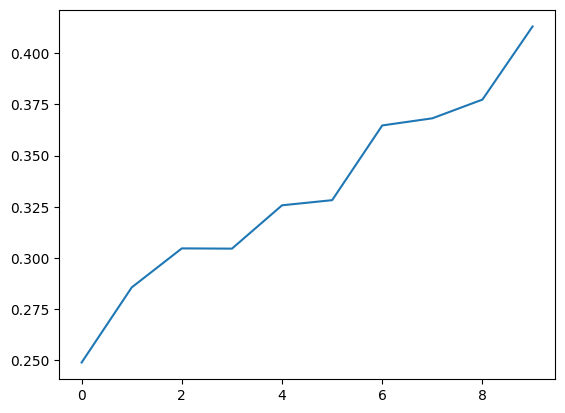

In [ ]:
pd.Series(coherence_values_Gerald).plot()

In [ ]:
topics_Gerald = model_list_Gerald[9].show_topics(num_topics=11, num_words=15, log=False, formatted=False)
topics_Gerald

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  [('home', 0.06392622),
   ('good', 0.038809825),
   ('day', 0.038807634),
   ('even', 0.026256641),
   ('room', 0.026256641),
   ('time', 0.026256282),
   ('old', 0.026256144),
   ('like', 0.026254926),
   ('way', 0.02625369),
   ('mrs', 0.026253546),
   ('child', 0.02625295),
   ('mother', 0.026252514),
   ('neighbor', 0.0262511),
   ('sick', 0.0137010105),
   ('could', 0.0137008)]),
 (1,
  [('god', 0.039474897),
   ('mother', 0.03947487),
   ('way', 0.03947308),
   ('wagon', 0.029825151),
   ('daughter', 0.029825151),
   ('always', 0.029825151),
   ('well', 0.029825151),
   ('man', 0.029823435),
   ('would', 0.029818863),
   ('dear', 0.020176155),
   ('ton', 0.02017578),
   ('family', 0.02017578),
   ('house', 0.02017578),
   ('pa', 0.020174583),
   ('little', 0.020174455)]),
 (2,
  [('yankees', 0.032431558),
   ('anything', 0.032429576),
   ('never', 0.03242805),
   ('god', 0.032427266),
   ('mother', 0.032427162),
   ('like', 0.032426998),
   ('much', 0.03242576),
   ('even'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


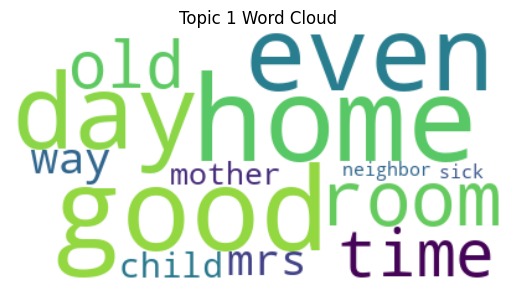

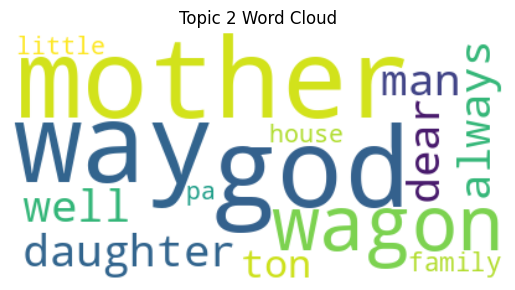

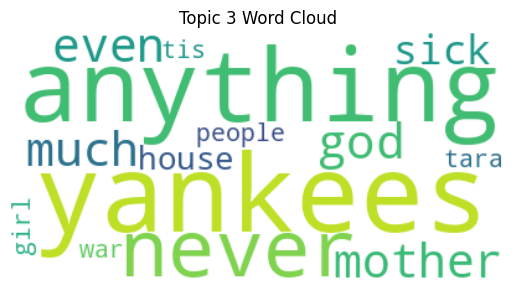

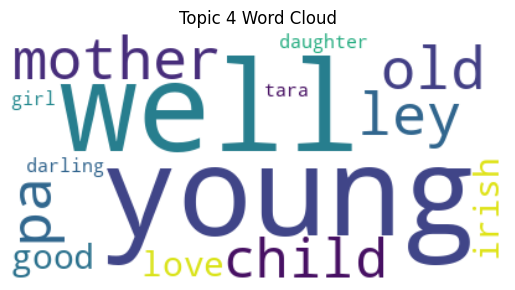

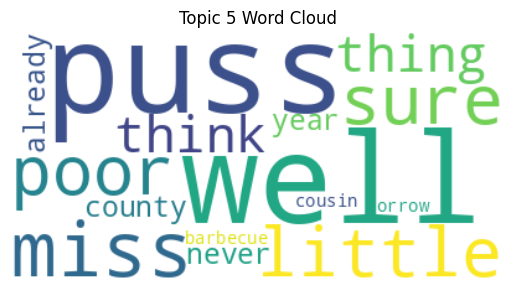

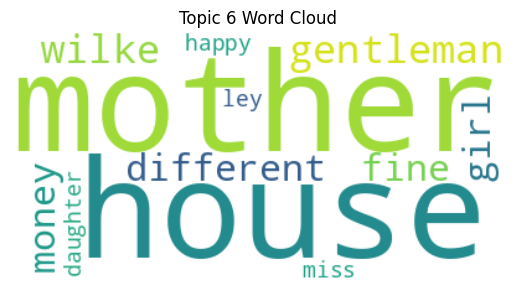

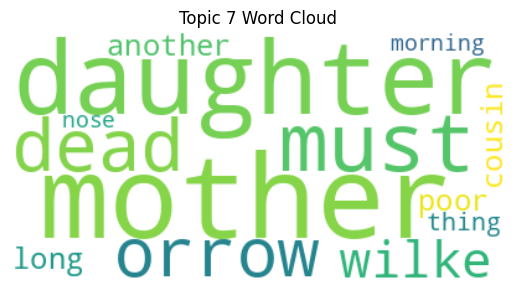

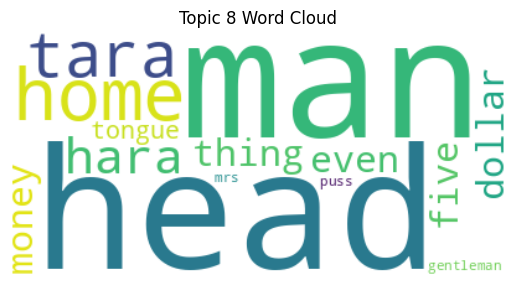

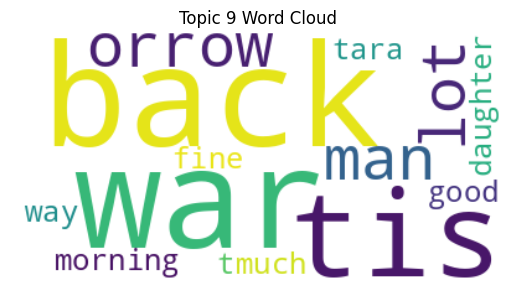

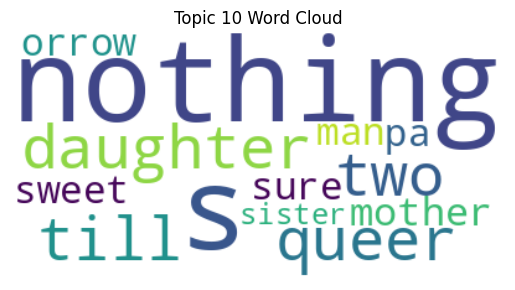

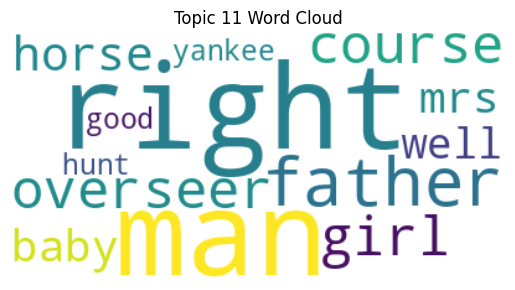

In [ ]:
print_word_clouds(topics_Gerald)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


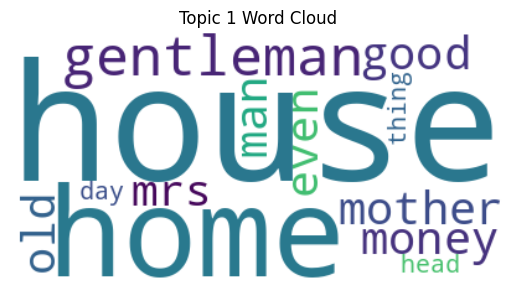

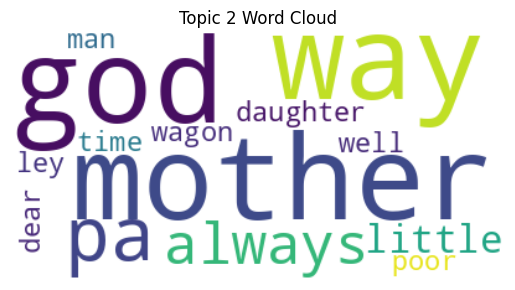

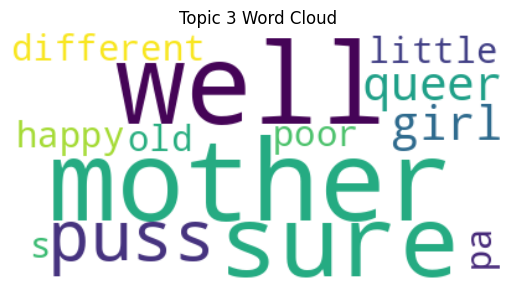

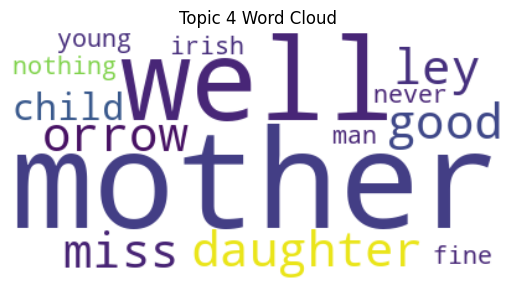

In [ ]:
print_word_clouds(model_list_Gerald[2].show_topics(num_topics=4, num_words=15, log=False, formatted=False))

In [ ]:
vis_Gerald = pyLDAvis.gensim.prepare(model_list_Gerald[2], bow_corpus_Gerald, dictionary_Gerald)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
vis_Gerald

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.094881 -0.045048       1        1  47.505225
1     -0.098097 -0.040759       2        1  36.073338
2      0.003215  0.085807       3        1  16.421437, topic_info=       Term       Freq      Total Category  logprob  loglift
78     sure   4.000000   4.000000  Default  30.0000  30.0000
11     well  14.000000  14.000000  Default  29.0000  29.0000
31  nothing   5.000000   5.000000  Default  28.0000  28.0000
30   mother  21.000000  21.000000  Default  27.0000  27.0000
37    would  13.000000  13.000000  Default  26.0000  26.0000
..      ...        ...        ...      ...      ...      ...
8      puss   1.779599   8.797255   Topic3  -4.1494   0.2085
24    thing   1.639712   8.002519   Topic3  -4.2312   0.2213
12  already   1.103295   3.889108   Topic3  -4.6275   0.5467
99    irish   1.098453   3.959231   Topic3  -4.6318   0.5244
29     like   1.595874  18.226678   Topic3  -4.2583  -0.6289

[171 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
120       3  0.719591       ah
12        2  0.514257  already
12        3  0.257128  already
90        2  0.809315   always
80        2  0.642626  another
...     ...       ...      ...
97        2  0.174948   yankee
97        3  0.174948   yankee
26        2  0.819527     year
105       1  0.746475    young
105       2  0.298590    young

[200 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

### Rhett_Scarlett

In [ ]:
corpus_Rhett, dictionary_Rhett, bow_corpus_Rhett = prepare_LDA_data(processed_TM_Rhett)
model_list_Rhett, coherence_values_Rhett = compute_coherence_values(dictionary=dictionary_Rhett, corpus=bow_corpus_Rhett, texts=corpus_Rhett, start=2, limit=12, step=1, alpha="auto", eta="auto")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
coherence_values_Rhett

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[0.19853039278153217,
 0.21062498261888227,
 0.2573124688015411,
 0.2727381545082549,
 0.2694441590815781,
 0.2567133134867532,
 0.27053549654216047,
 0.27604267707291535,
 0.24989353685345222,
 0.2533220622825823]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

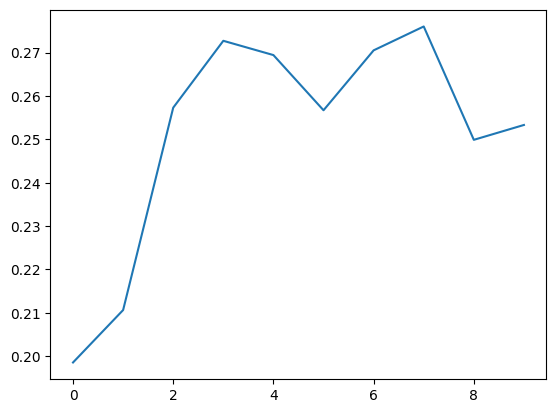

In [ ]:
pd.Series(coherence_values_Rhett).plot()

In [ ]:
topics_Rhett = model_list_Rhett[7].show_topics(num_topics=9, num_words=15, log=False, formatted=False)
topics_Rhett

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  [('money', 0.026433617),
   ('something', 0.015282759),
   ('man', 0.015281741),
   ('ready', 0.015095166),
   ('rough', 0.01508648),
   ('hungry', 0.0115649365),
   ('two', 0.01156472),
   ('one', 0.01156455),
   ('doctor', 0.011564212),
   ('month', 0.011564199),
   ('baby', 0.011564192),
   ('mile', 0.011519261),
   ('road', 0.010674736),
   ('would', 0.007851476),
   ('anything', 0.007849684)]),
 (1,
  [('would', 0.034112282),
   ('money', 0.027046572),
   ('never', 0.020689545),
   ('could', 0.020112857),
   ('good', 0.017675841),
   ('tara', 0.014098654),
   ('like', 0.011756593),
   ('home', 0.011560077),
   ('well', 0.011434962),
   ('ever', 0.011281555),
   ('anything', 0.011113628),
   ('dear', 0.010835868),
   ('thing', 0.010780391),
   ('yes', 0.009764083),
   ('much', 0.00953567)]),
 (2,
  [('one', 0.027585985),
   ('like', 0.025383983),
   ('house', 0.01782641),
   ('good', 0.01606448),
   ('money', 0.014301961),
   ('man', 0.013751249),
   ('old', 0.01253819),
   

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


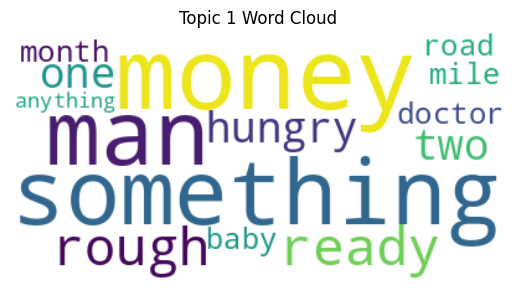

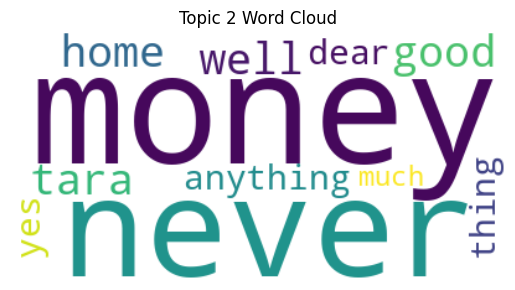

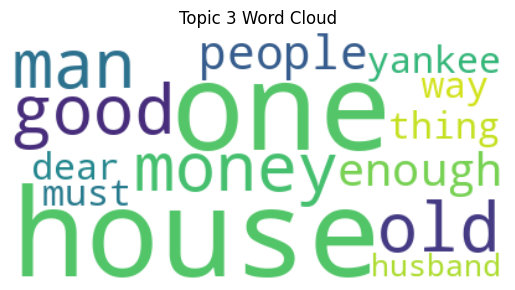

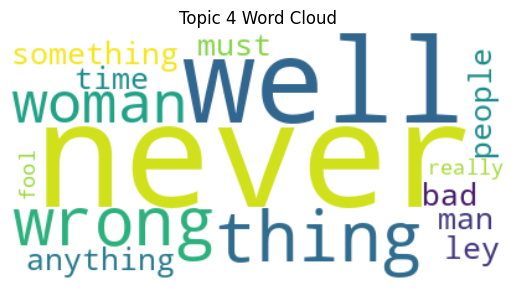

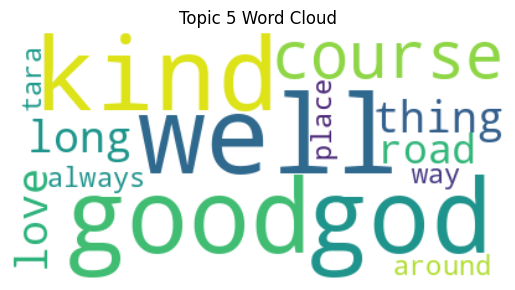

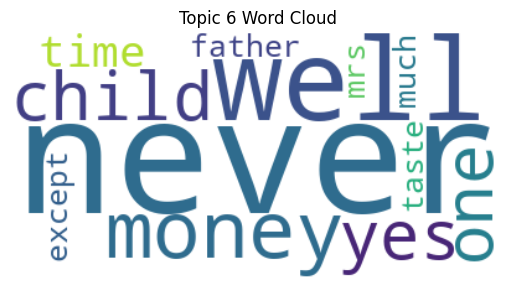

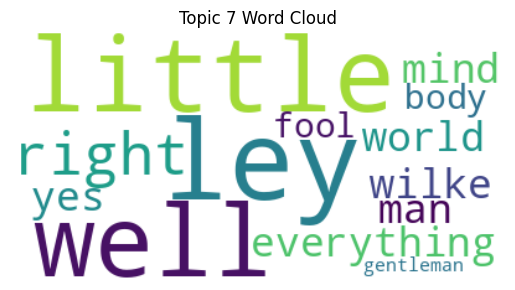

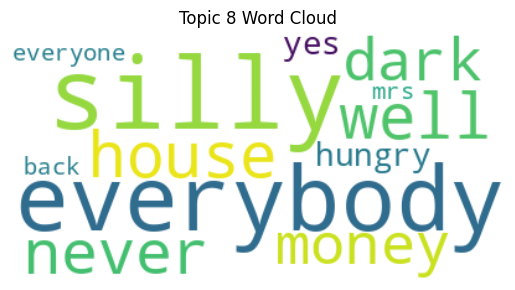

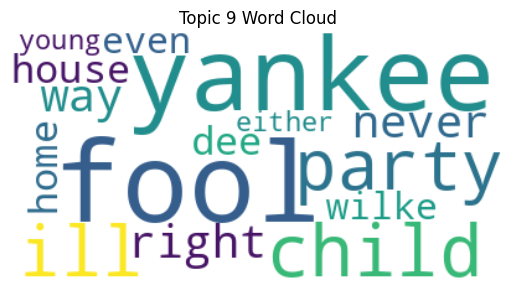

In [ ]:
print_word_clouds(topics_Rhett)

In [ ]:
vis_Rhett = pyLDAvis.gensim.prepare(model_list_Rhett[7], bow_corpus_Rhett, dictionary_Rhett)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
vis_Rhett

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.057603  0.012795       1        1  31.367091
3      0.006096  0.050904       2        1  18.340534
2     -0.027122 -0.002159       3        1  13.094114
6     -0.051926  0.032741       4        1   8.117454
5     -0.097467  0.004415       5        1   7.233666
4      0.032362 -0.088147       6        1   6.881106
0      0.068597  0.147747       7        1   5.353891
7     -0.037255 -0.105309       8        1   5.115135
8      0.164318 -0.052989       9        1   4.497009, topic_info=      Term       Freq      Total Category  logprob  loglift
242    ley  27.000000  27.000000  Default  30.0000  30.0000
34   money  61.000000  61.000000  Default  29.0000  29.0000
268  child  22.000000  22.000000  Default  28.0000  28.0000
128   like  59.000000  59.000000  Default  27.0000  27.0000
98    well  55.000000  55.000000  Default  26.0000  26.0000
..     ...        ...        ...      ...      ...      ...
253   army   1.542592  13.687659   Topic9  -4.7112   0.9187
213   mind   1.542592  13.913632   Topic9  -4.7112   0.9024
35     mrs   1.542592  14.937238   Topic9  -4.7112   0.8314
98    well   1.552086  55.733704   Topic9  -4.7051  -0.4792
21   thing   1.542592  36.173598   Topic9  -4.7112  -0.0531

[575 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
122       2  0.401204    abroad
122       7  0.401204    abroad
150       9  0.872093  accident
419       2  0.748471    afraid
419       3  0.187118    afraid
...     ...       ...       ...
160       2  0.273745     young
160       3  0.136873     young
160       4  0.136873     young
160       7  0.136873     young
160       9  0.273745     young

[1148 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 3, 7, 6, 5, 1, 8, 9])

### Mallet Topic Modelling

In [ ]:
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


--2024-05-24 19:12:53--  http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Resolving mallet.cs.umass.edu (mallet.cs.umass.edu)... 128.119.246.70
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://mallet.cs.umass.edu/dist/mallet-2.0.8.zip [following]
--2024-05-24 19:12:53--  https://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
Connecting to mallet.cs.umass.edu (mallet.cs.umass.edu)|128.119.246.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16184794 (15M) [application/zip]
Saving to: ‘mallet-2.0.8.zip’

mallet-2.0.8.zip    100%[===================>]  15.43M  14.7MB/s    in 1.1s    

2024-05-24 19:12:54 (14.7 MB/s) - ‘mallet-2.0.8.zip’ saved [16184794/16184794]



In [ ]:
!unzip mallet-2.0.8.zip

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Archive:  mallet-2.0.8.zip
   creating: mallet-2.0.8/
   creating: mallet-2.0.8/bin/
  inflating: mallet-2.0.8/bin/classifier2info  
  inflating: mallet-2.0.8/bin/csv2classify  
  inflating: mallet-2.0.8/bin/csv2vectors  
  inflating: mallet-2.0.8/bin/mallet  
  inflating: mallet-2.0.8/bin/mallet.bat  
  inflating: mallet-2.0.8/bin/mallethon  
  inflating: mallet-2.0.8/bin/prepend-license.sh  
  inflating: mallet-2.0.8/bin/svmlight2vectors  
  inflating: mallet-2.0.8/bin/text2classify  
  inflating: mallet-2.0.8/bin/text2vectors  
  inflating: mallet-2.0.8/bin/vectors2classify  
  inflating: mallet-2.0.8/bin/vectors2info  
  inflating: mallet-2.0.8/bin/vectors2topics  
  inflating: mallet-2.0.8/bin/vectors2vectors  
  inflating: mallet-2.0.8/build.xml  
   creating: mallet-2.0.8/class/
   creating: mallet-2.0.8/class/cc/
   creating: mallet-2.0.8/class/cc/mallet/
   creating: mallet-2.0.8/class/cc/mallet/classify/
  inflating: mallet-2.0.8/class/cc/mallet/classify/AdaBoost.class  
  in

In [ ]:
mallet_path = "content/mallet-2.0.8/bin/mallet"

In [ ]:
# Required libraries
import os
from gensim.corpora import Dictionary
from gensim.models import LdaMallet
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt

# Function to train MALLET model
def train_mallet_model(mallet_path, corpus, num_topics, id2word, output_dir):
    # Train MALLET LDA model
    lda_mallet = LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)

    # Save model to file
    model_file = os.path.join(output_dir, 'mallet_model')
    lda_mallet.save(model_file)

    return lda_mallet, model_file

# Function to evaluate model coherence
def evaluate_mallet_model(lda_mallet, texts, dictionary, coherence='c_v'):
    coherence_model_ldamallet = CoherenceModel(model=lda_mallet, texts=texts, dictionary=dictionary, coherence=coherence)
    coherence_score = coherence_model_ldamallet.get_coherence()

    return coherence_score


corpus = []  # Your preprocessed corpus in the required format
num_topics = 10  # Number of topics to extract
output_dir = '/path/to/output/directory'  # Directory to save the model

# Create a Dictionary from the corpus
id2word = Dictionary(corpus)

# Train the MALLET model
lda_mallet, model_file = train_mallet_model(mallet_path, corpus, num_topics, id2word, output_dir)

# Evaluate the model using coherence score
coherence_score = evaluate_mallet_model(lda_mallet, corpus, id2word)
print(f"Coherence Score: {coherence_score}")

# Optionally, you can save and visualize the topics
topics = lda_mallet.show_topics(num_topics=num_topics, formatted=False)
for topic_num, words in topics:
    print(f"Topic {topic_num}: {words}")

# Example visualization (if needed)
coherence_values = []
for num_topics in range(5, 16):
    lda_mallet = LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
    coherence_model_ldamallet = CoherenceModel(model=lda_mallet, texts=corpus, dictionary=id2word, coherence='c_v')
    coherence_values.append(coherence_model_ldamallet.get_coherence())

# Plot coherence score vs number of topics
topics_range = range(5, 16)
plt.plot(topics_range, coherence_values, marker='o')
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.title("Coherence Score vs Number of Topics")
plt.show()

In [ ]:
!pip install little_mallet_wrapper

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import little_mallet_wrapper as lmw

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
topic_keys, topic_distributions = lmw.quick_train_topic_model(mallet_path,
                                                              "/content/output_mallet",
                                                              9,
                                                              processed_TM_Rhett)

In [ ]:
for i, t in enumerate(topic_keys):
    print(i, '\t', ' '.join(t[:10]))

0 	 never well would like good could thing money man ever
1 	 people hell bed wrong body nice old like new full
2 	 child mother blue father party decent old kind dee probably
3 	 long time nothing mrs war wilke night last get brave
4 	 yankee army home road tara old yankees yes horse ready
5 	 house lady everybody green shall anything bonnet one taste big
6 	 one sister ball ton system prisoner silly mighty doctor yet
7 	 money miss cotton dollar time hard confederate three real point
8 	 england south sometimes never war hamilton mercenary soul besides pauper


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
topic_keys, topic_distributions = lmw.quick_train_topic_model(mallet_path,
                                                              "/content/output_mallet",
                                                              10,
                                                              processed_TM_Ashley)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Importing data...
Complete
Training topic model...
Complete


In [ ]:
for i, t in enumerate(topic_keys):
    print(i, '\t', ' '.join(t[:10]))

0 	 ley would well could never like world nothing dear good
1 	 thing bad like darky legislature rather heart probably refinement whole
2 	 every home darkie anything hand people something free road yankees
3 	 war man father cotton anything chicken away one misery convict
4 	 least one murder ame desperate south everybody wonder abuse convict
5 	 money smart bank interest cent even hell taint pleasure saloon
6 	 life day war first old bad shadow real dream show
7 	 well else coward reason new word mrs time partly sweet
8 	 man like thing person party surprise money old happy grandpa
9 	 first matter side indeed charm mrs must woman whether varmint


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
topic_keys, topic_distributions = lmw.quick_train_topic_model(mallet_path,
                                                              "/content/output_mallet",
                                                              10,
                                                              processed_TM_Melanie)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Importing data...
Complete
Training topic model...
Complete


In [ ]:
for i, t in enumerate(topic_keys):
    print(i, '\t', ' '.join(t[:10]))

0 	 dee people poor man fiddle load love share many nice
1 	 wilke thing husband arrest alike soon may dear matter minute
2 	 till enough reception clock five late thought sure heart wife
3 	 would ley never baby darling god could good home dear
4 	 could everything folk alone back lord anyone silly pistol baby
5 	 back house yankees else must miss horse sister fire escort
6 	 reel birthday since party black hard selfish maybe dance ought
7 	 place hush drunk two get office woman salt man may
8 	 yes look yankee minute please true ever goose nobody god
9 	 must well like time home mrs hospital right bad lady


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
topic_keys, topic_distributions = lmw.quick_train_topic_model(mallet_path,
                                                              "/content/output_mallet",
                                                              10,
                                                              processed_TM_Gerald)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Importing data...
Complete
Training topic model...
Complete


In [ ]:
for i, t in enumerate(topic_keys):
    print(i, '\t', ' '.join(t[:10]))

0 	 queer lament darling way horse lad lee really surely honestly
1 	 money yankee house may rise ing hope genteel hand work
2 	 man right plantation old tara fine twin one thunder turkey
3 	 always morning place starvation worth room yankees shall trouble bravery
4 	 war never county silver without husband anything bit work world
5 	 
6 	 money could small ill effort spite comfortable knowledge grave school
7 	 week cousin atlanta cade darky meddler layover air flat later
8 	 even thing sick martyr eye ninny troubles cruel noise furniture
9 	 mother like well would daughter home good puss god girl


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
